<a href="https://colab.research.google.com/github/Agniva-c11/Air_Quality_Index/blob/main/Air_Quality_Index3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [94]:
# Loading the file from csv to pandas dataframe
df = pd.read_csv('/content/city_day.csv')

In [95]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [96]:
df = df.iloc[:, :-1]

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     29531 non-null  object 
 1   Date     29531 non-null  object 
 2   PM2.5    24933 non-null  float64
 3   PM10     18391 non-null  float64
 4   NO       25949 non-null  float64
 5   NO2      25946 non-null  float64
 6   NOx      25346 non-null  float64
 7   NH3      19203 non-null  float64
 8   CO       27472 non-null  float64
 9   SO2      25677 non-null  float64
 10  O3       25509 non-null  float64
 11  Benzene  23908 non-null  float64
 12  Toluene  21490 non-null  float64
 13  Xylene   11422 non-null  float64
 14  AQI      24850 non-null  float64
dtypes: float64(13), object(2)
memory usage: 3.4+ MB


In [98]:
# Checking how many null or missing values are present in each feature
df.isnull().sum()

City           0
Date           0
PM2.5       4598
PM10       11140
NO          3582
NO2         3585
NOx         4185
NH3        10328
CO          2059
SO2         3854
O3          4022
Benzene     5623
Toluene     8041
Xylene     18109
AQI         4681
dtype: int64

In [99]:
# Replacing all the null values with the mean of that particular column
mean1 = df['PM2.5'].mean()
df['PM2.5'] = df['PM2.5'].fillna(mean1)

In [100]:
mean2 = df['PM10'].mean()
df['PM10'] = df['PM10'].fillna(mean2)

In [101]:


mean3 = df['NO'].mean()
df['NO'] = df['NO'].fillna(mean3)

In [102]:
mean4 = df['NO2'].mean()
df['NO2'] = df['NO2'].fillna(mean4)

In [103]:
mean5 = df['NOx'].mean()
df['NOx'] = df['NOx'].fillna(mean5)

In [104]:
mean6 = df['NH3'].mean()
df['NH3'] = df['NH3'].fillna(mean6)

In [105]:
mean7 = df['CO'].mean()
df['CO'] = df['CO'].fillna(mean7)

In [106]:
mean8 = df['SO2'].mean()
df['SO2'] = df['SO2'].fillna(mean8)

In [107]:
mean9 = df['O3'].mean()
df['O3'] = df['O3'].fillna(mean9)

In [108]:
mean10 = df['Benzene'].mean()
df['Benzene'] = df['Benzene'].fillna(mean10)

In [109]:
mean11 = df['Toluene'].mean()
df['Toluene'] = df['Toluene'].fillna(mean11)

In [110]:
mean12 = df['Xylene'].mean()
df['Xylene'] = df['Xylene'].fillna(mean12)

In [111]:
mean13 = df['AQI'].mean()
df['AQI'] = df['AQI'].fillna(mean13)

In [112]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000


In [113]:
df.isnull().sum()

City       0
Date       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

[]

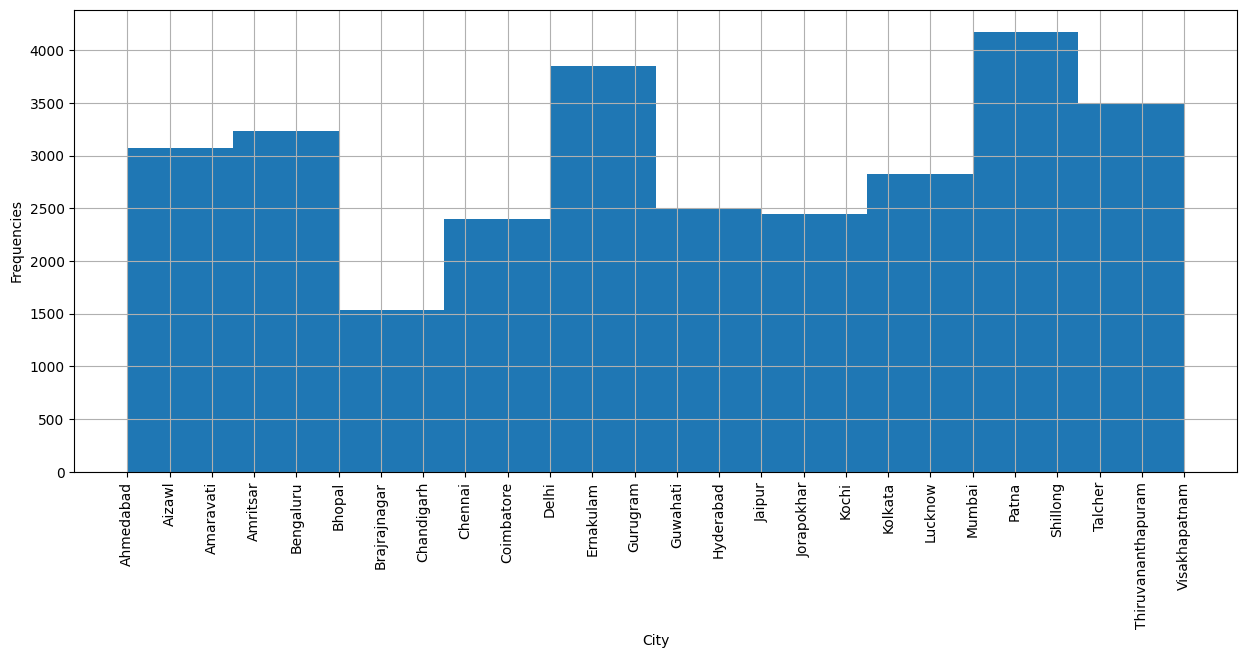

In [114]:
plt.figure(figsize = (15, 6))
plt.xticks(rotation = 90)
df.City.hist()
plt.xlabel('City')
plt.ylabel('Frequencies')
plt.plot()

<Axes: xlabel='City', ylabel='PM2.5'>

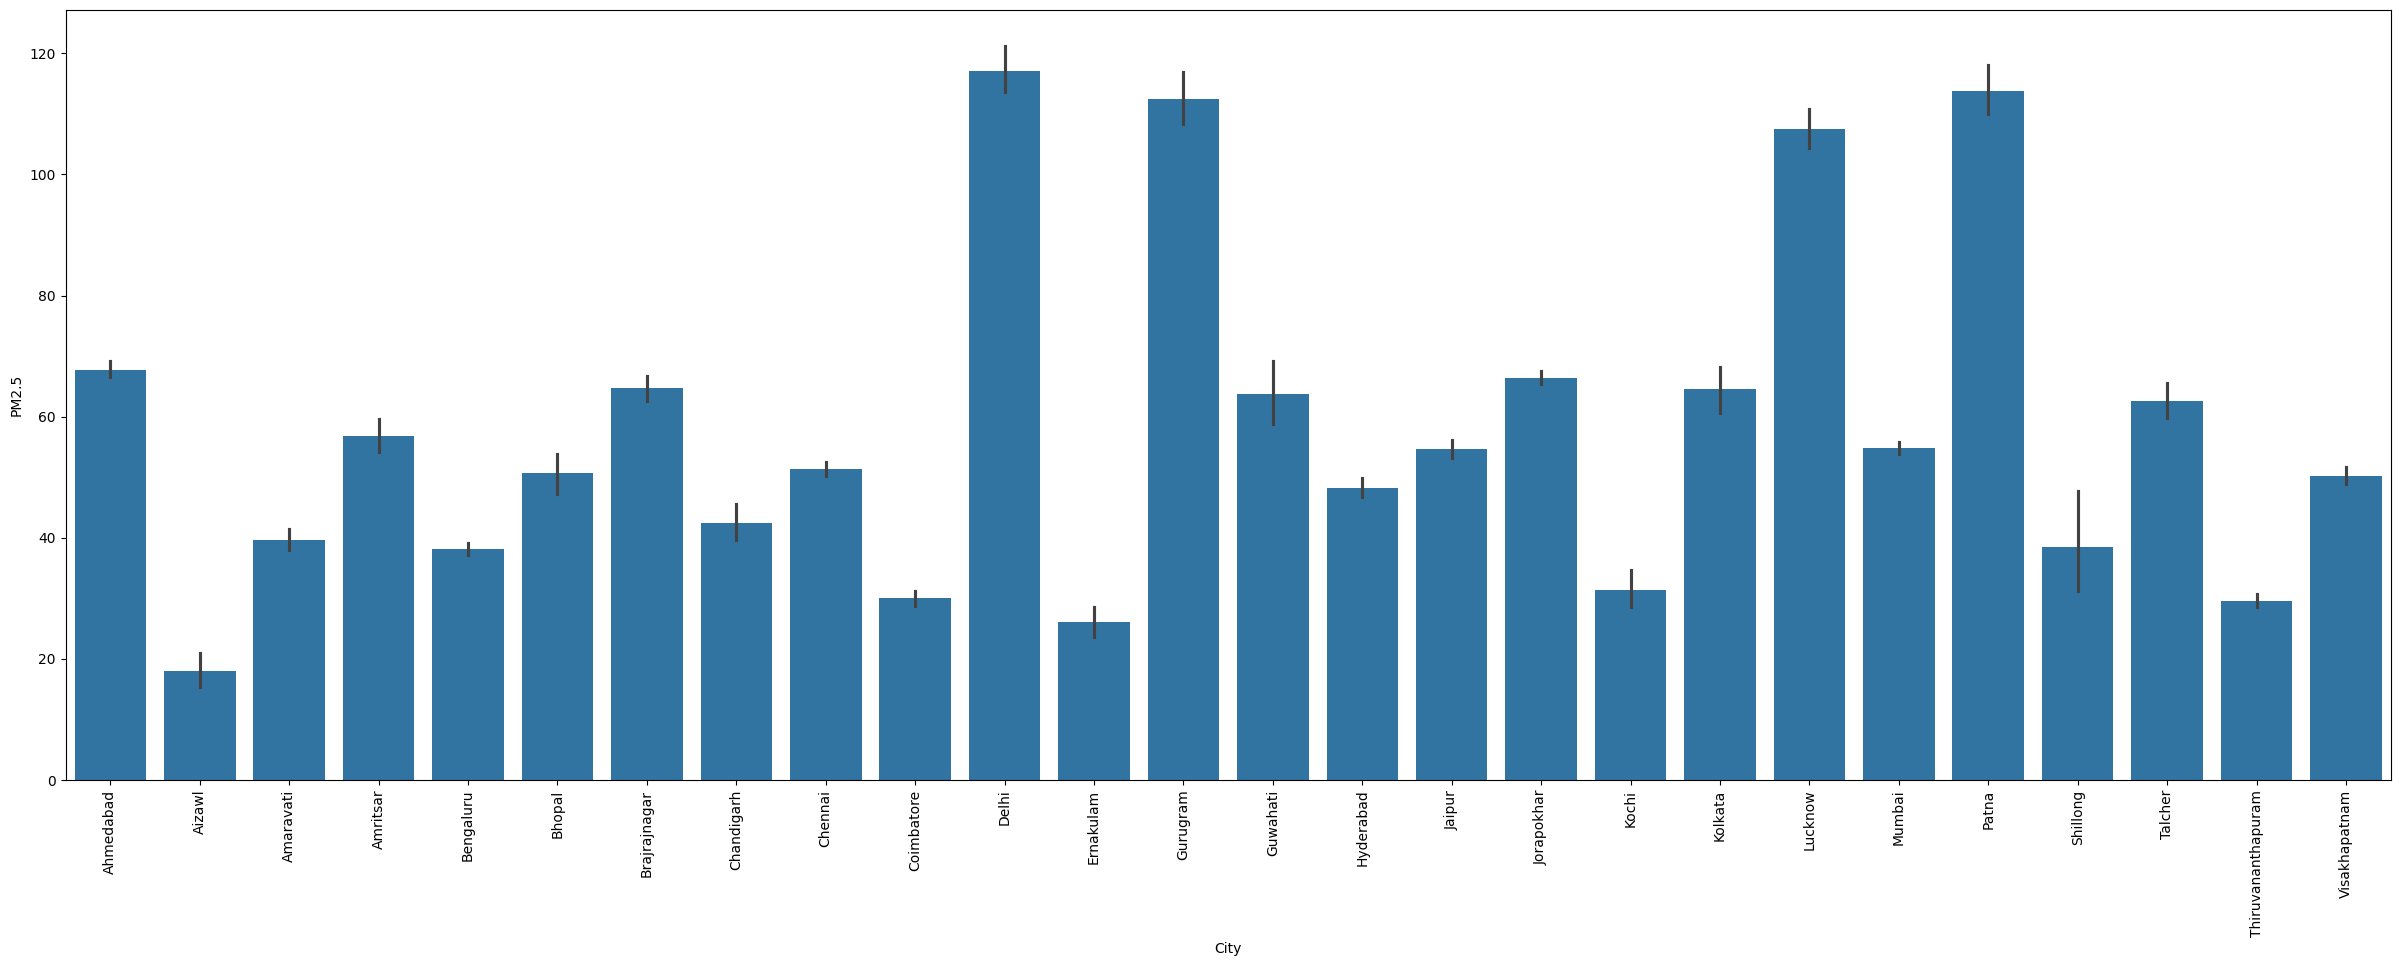

In [115]:
# This visualisation shows the value of PM2.5 in each of the states
plt.figure(figsize = (30, 10))
plt.xticks(rotation = 90)
sns.barplot(x = 'City', y = 'PM2.5', data = df)

<Axes: xlabel='City', ylabel='PM10'>

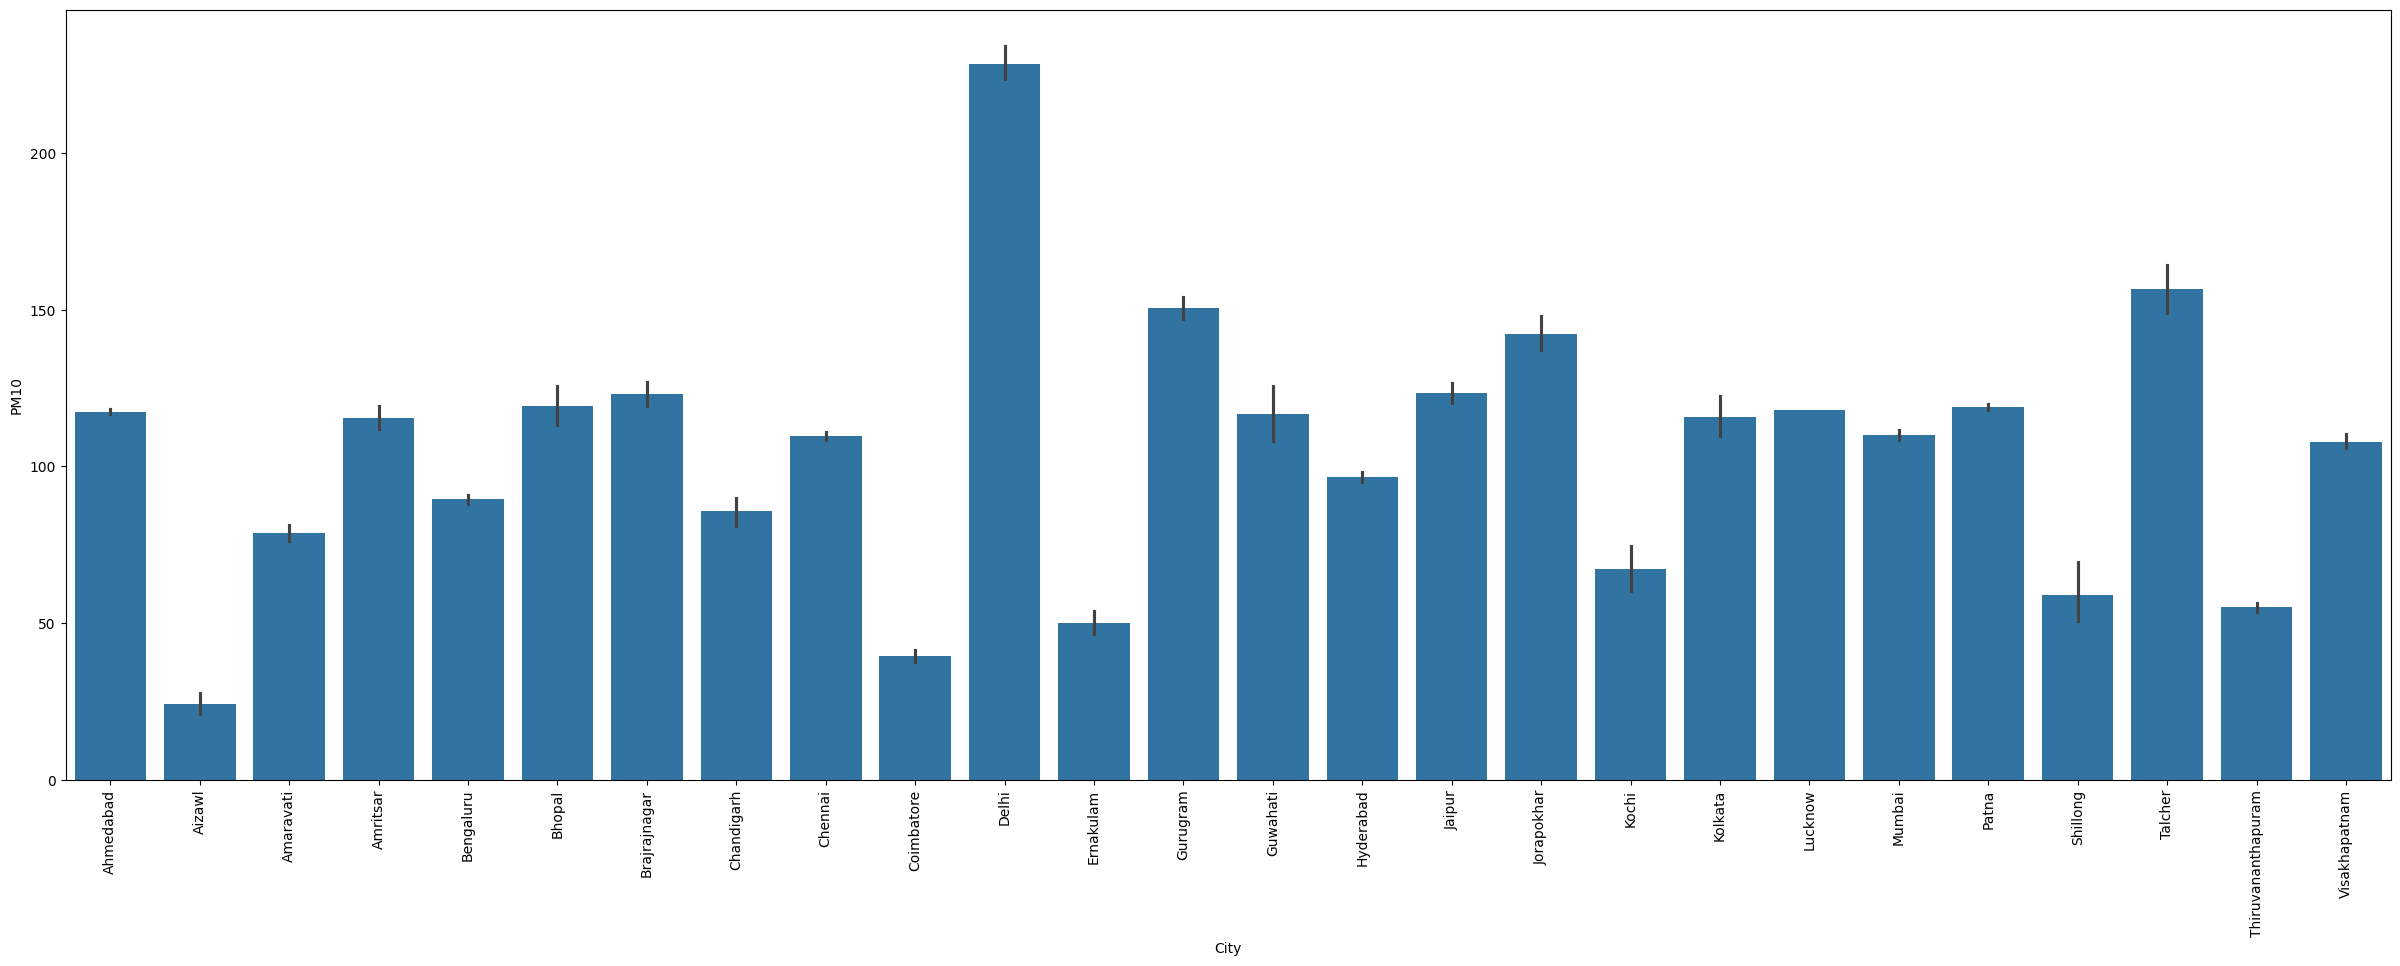

In [116]:
# This visualisation shows the value of PM10 in each of the states
plt.figure(figsize = (30, 10))
plt.xticks(rotation = 90)
sns.barplot(x = 'City', y = 'PM10', data = df)

<Axes: xlabel='City', ylabel='NO'>

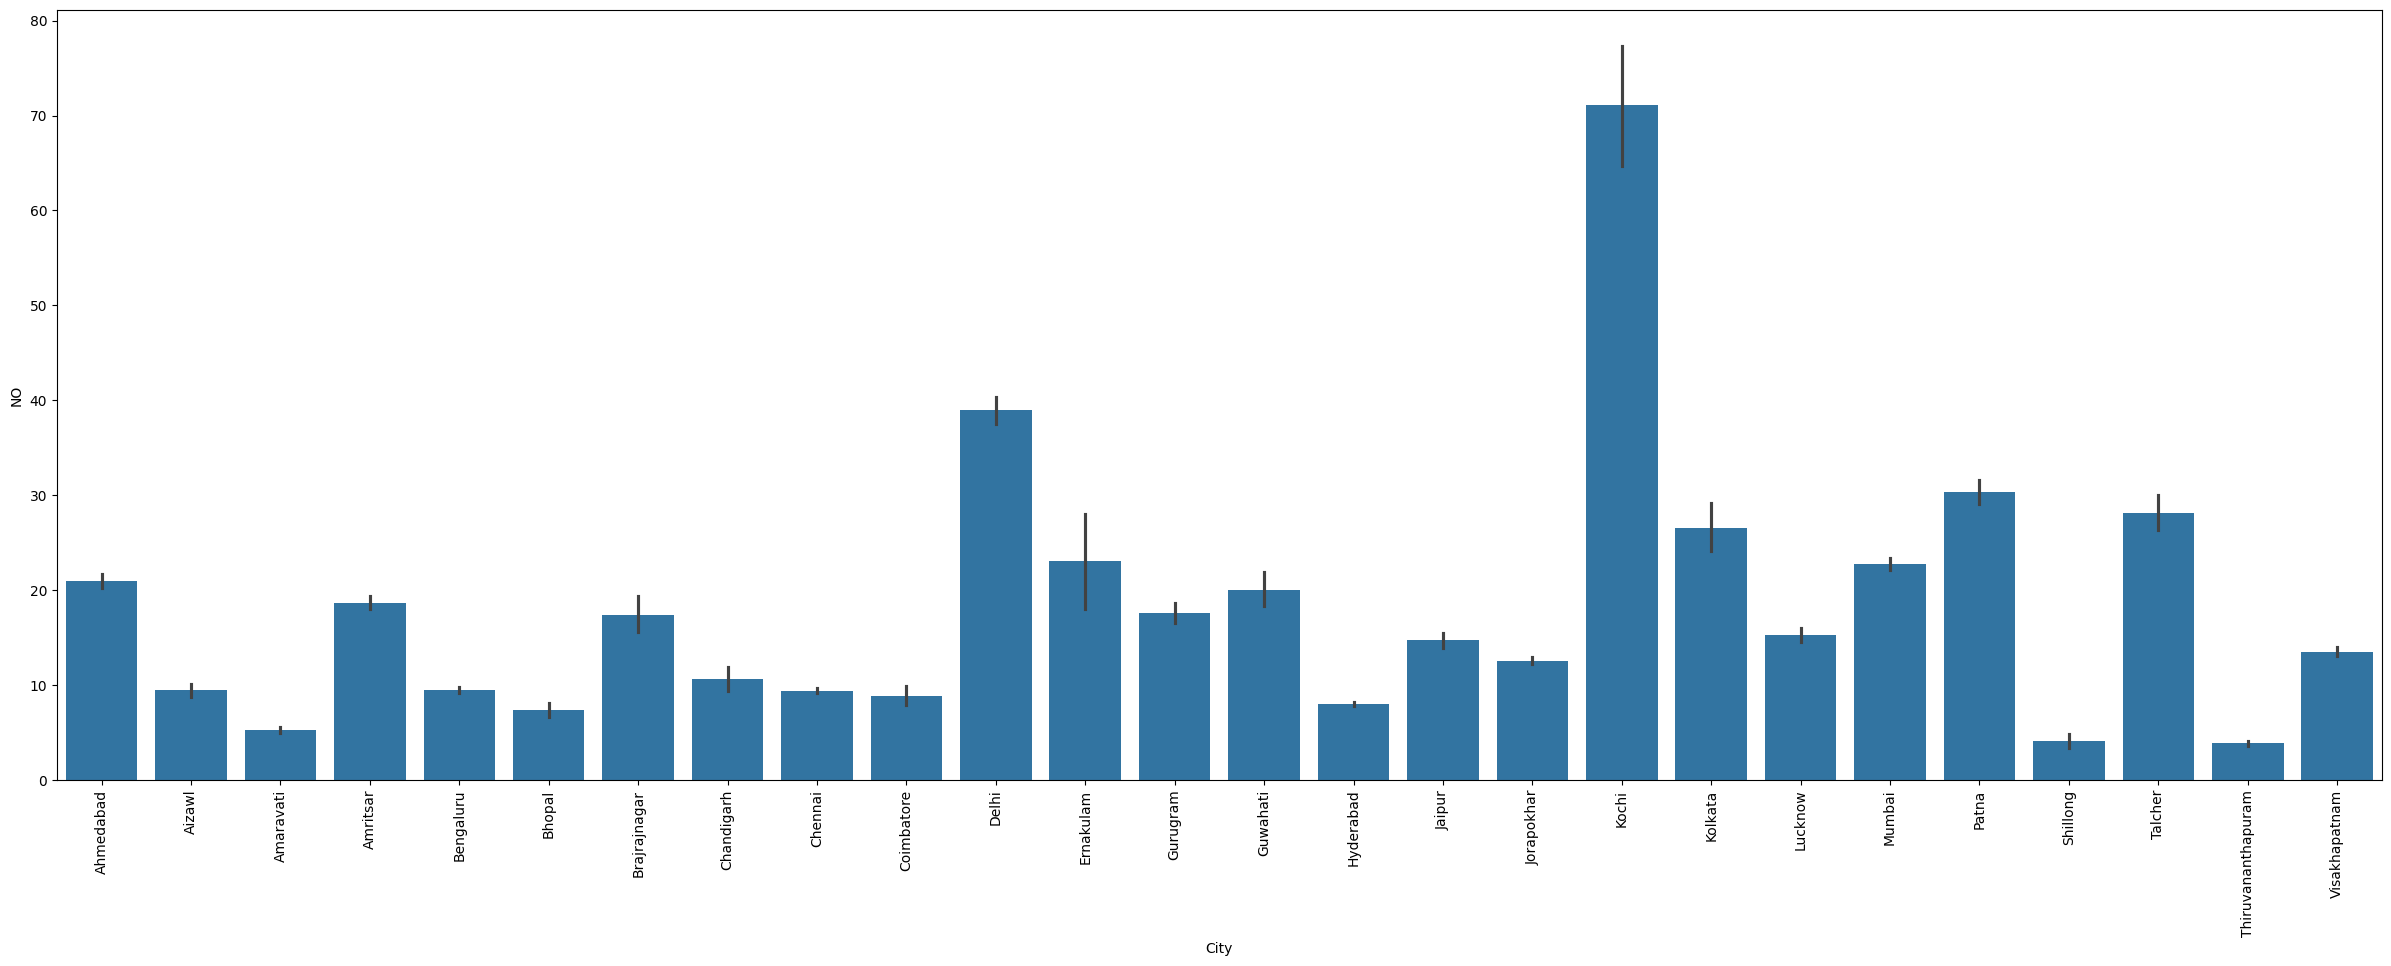

In [117]:
# This visualisation shows the value of NO in each of the states
plt.figure(figsize = (30, 10))
plt.xticks(rotation = 90)
sns.barplot(x = 'City', y = 'NO', data = df)

<Axes: xlabel='City', ylabel='NO2'>

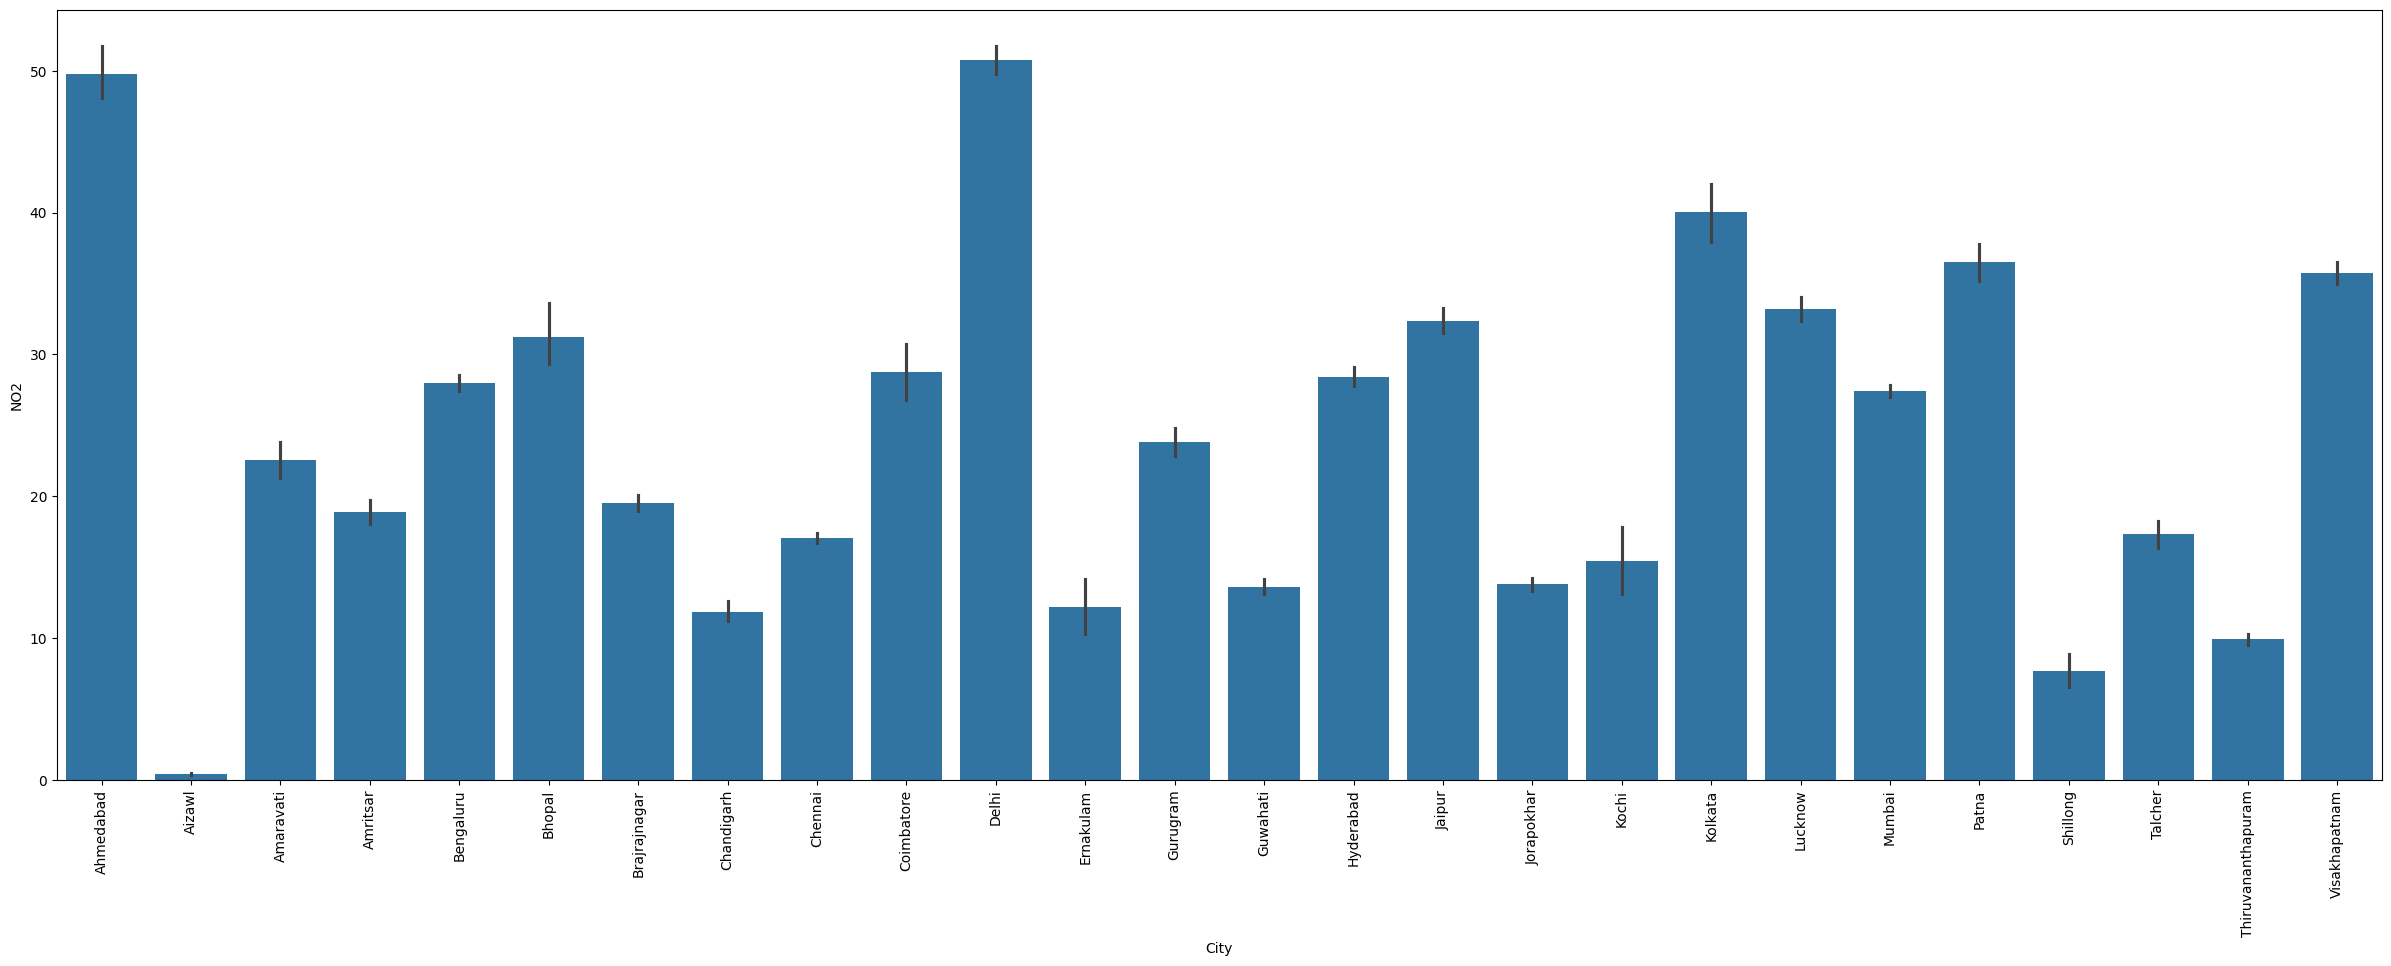

In [118]:
# This visualisation shows the value of NO2 in each of the states
plt.figure(figsize = (30, 10))
plt.xticks(rotation = 90)
sns.barplot(x = 'City', y = 'NO2', data = df)

<Axes: xlabel='City', ylabel='NOx'>

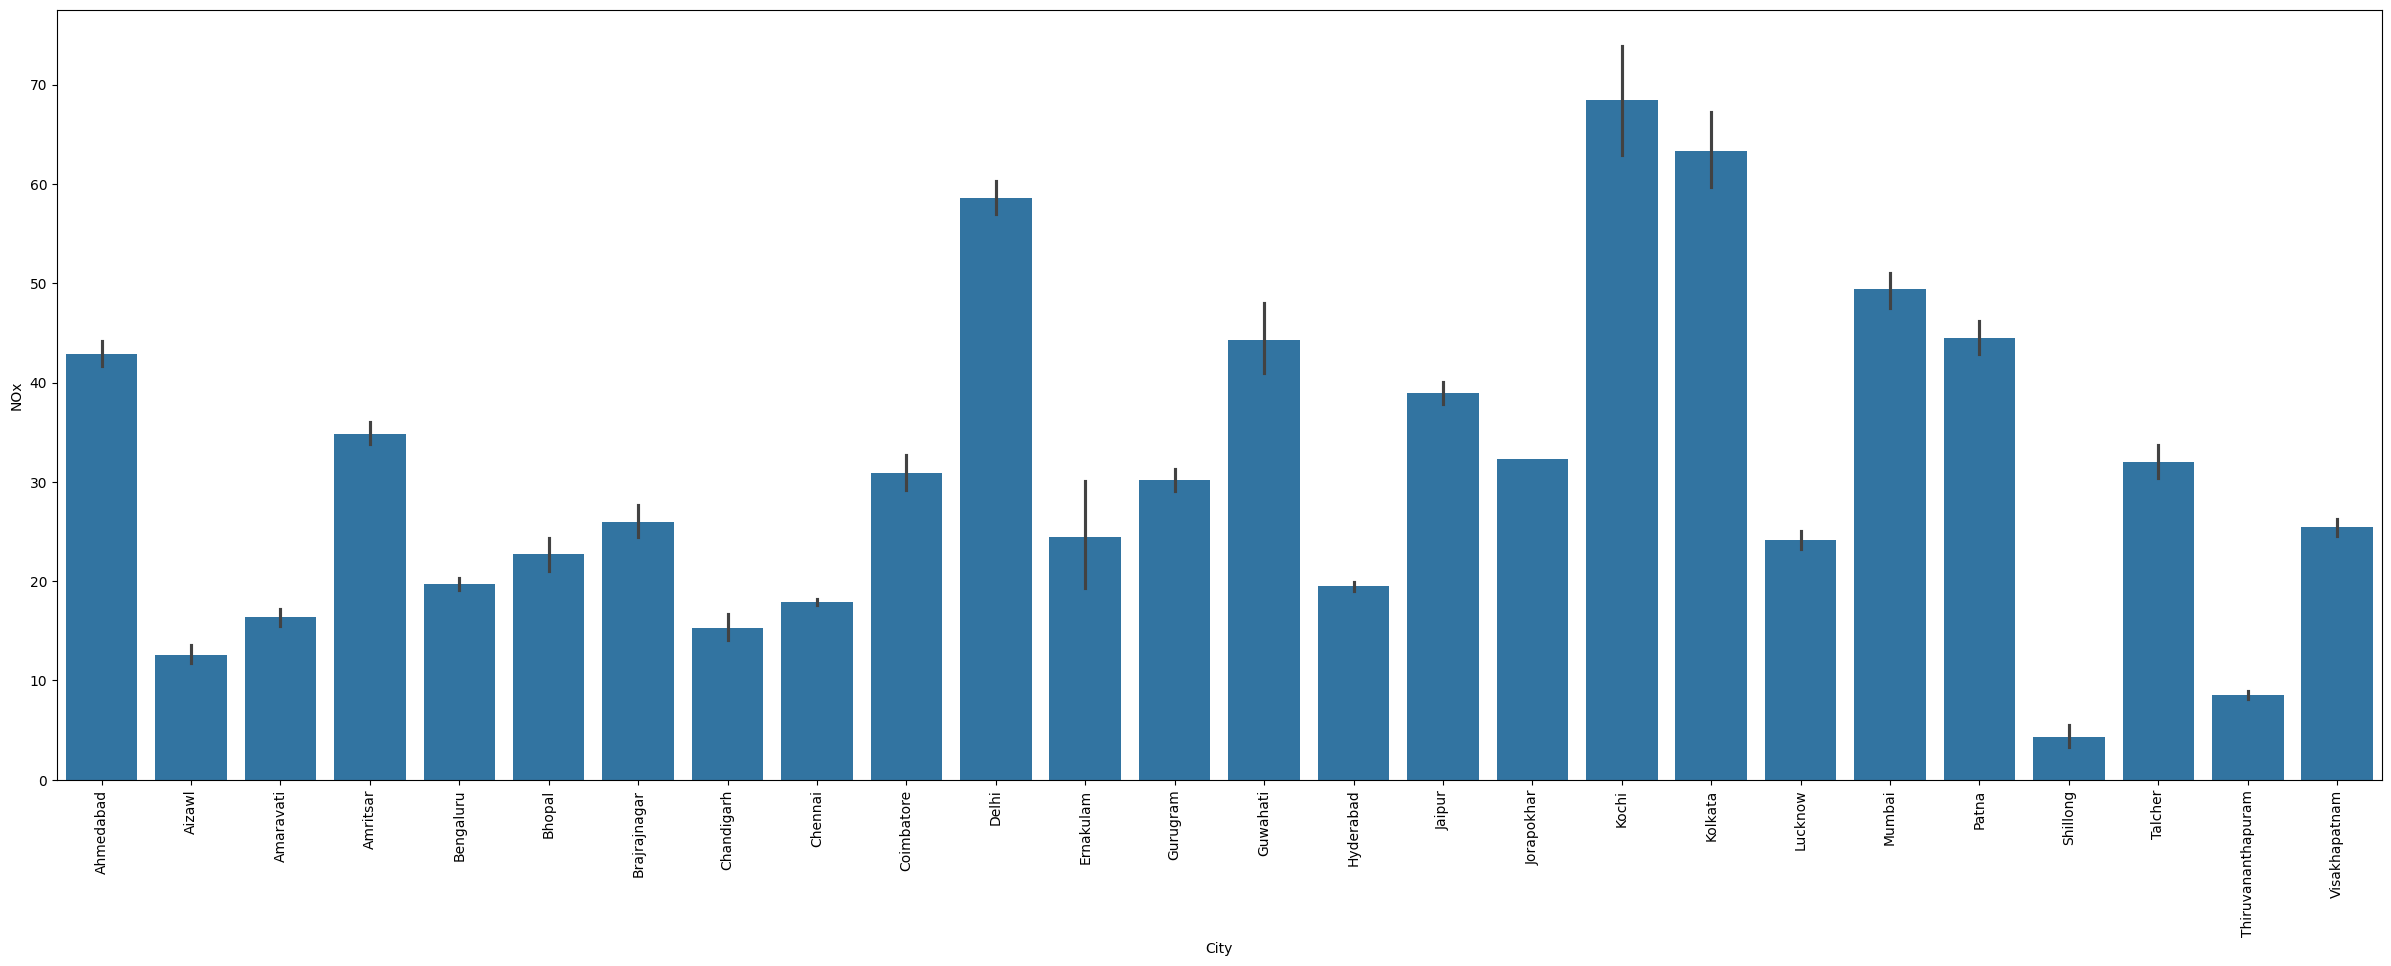

In [119]:
# This visualisation shows the value of NOx in each of the states
plt.figure(figsize = (30, 10))
plt.xticks(rotation = 90)
sns.barplot(x = 'City', y = 'NOx', data = df)

<Axes: xlabel='City', ylabel='NH3'>

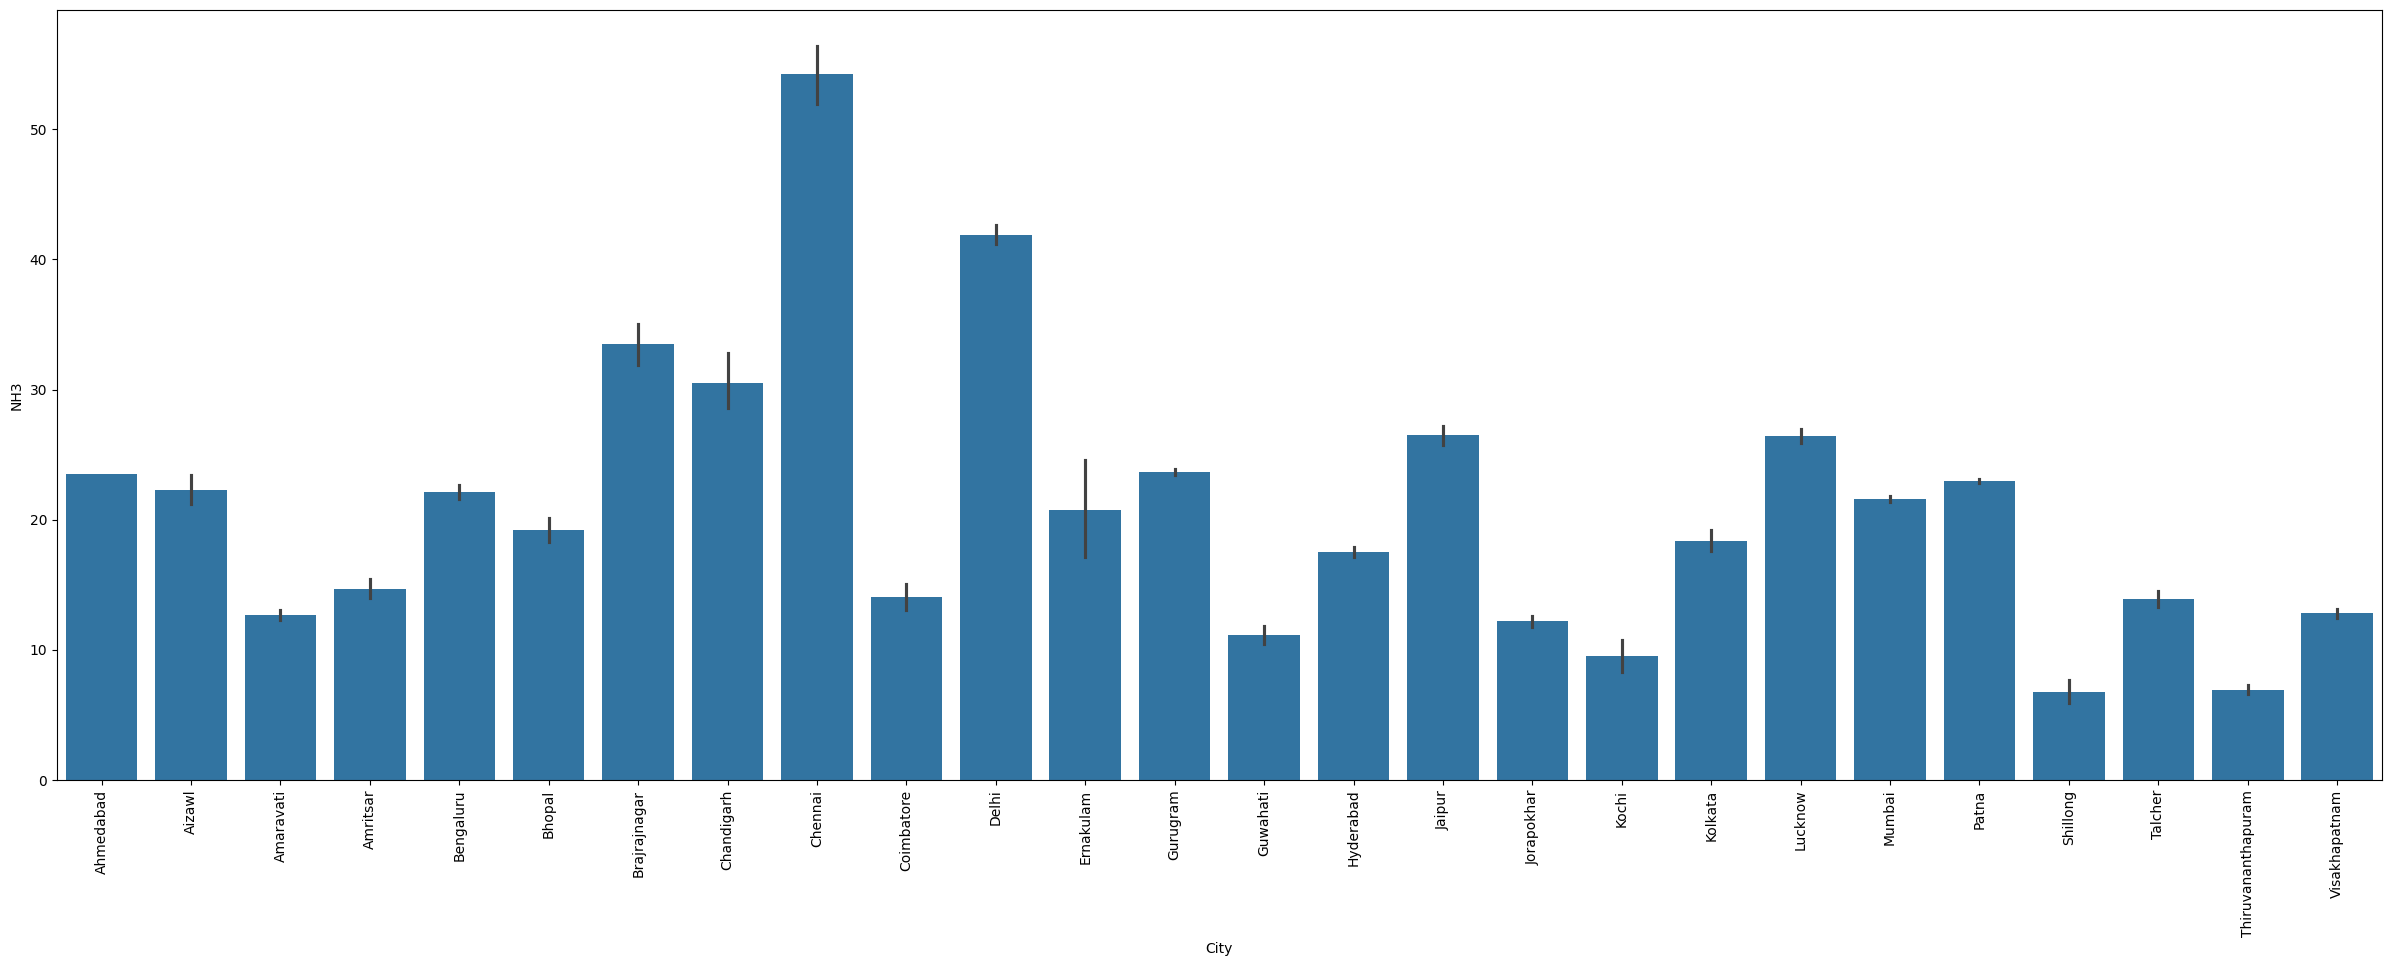

In [120]:
# This visualisation shows the value of NH3 in each of the states
plt.figure(figsize = (30, 10))
plt.xticks(rotation = 90)
sns.barplot(x = 'City', y = 'NH3', data = df)

<Axes: xlabel='City', ylabel='CO'>

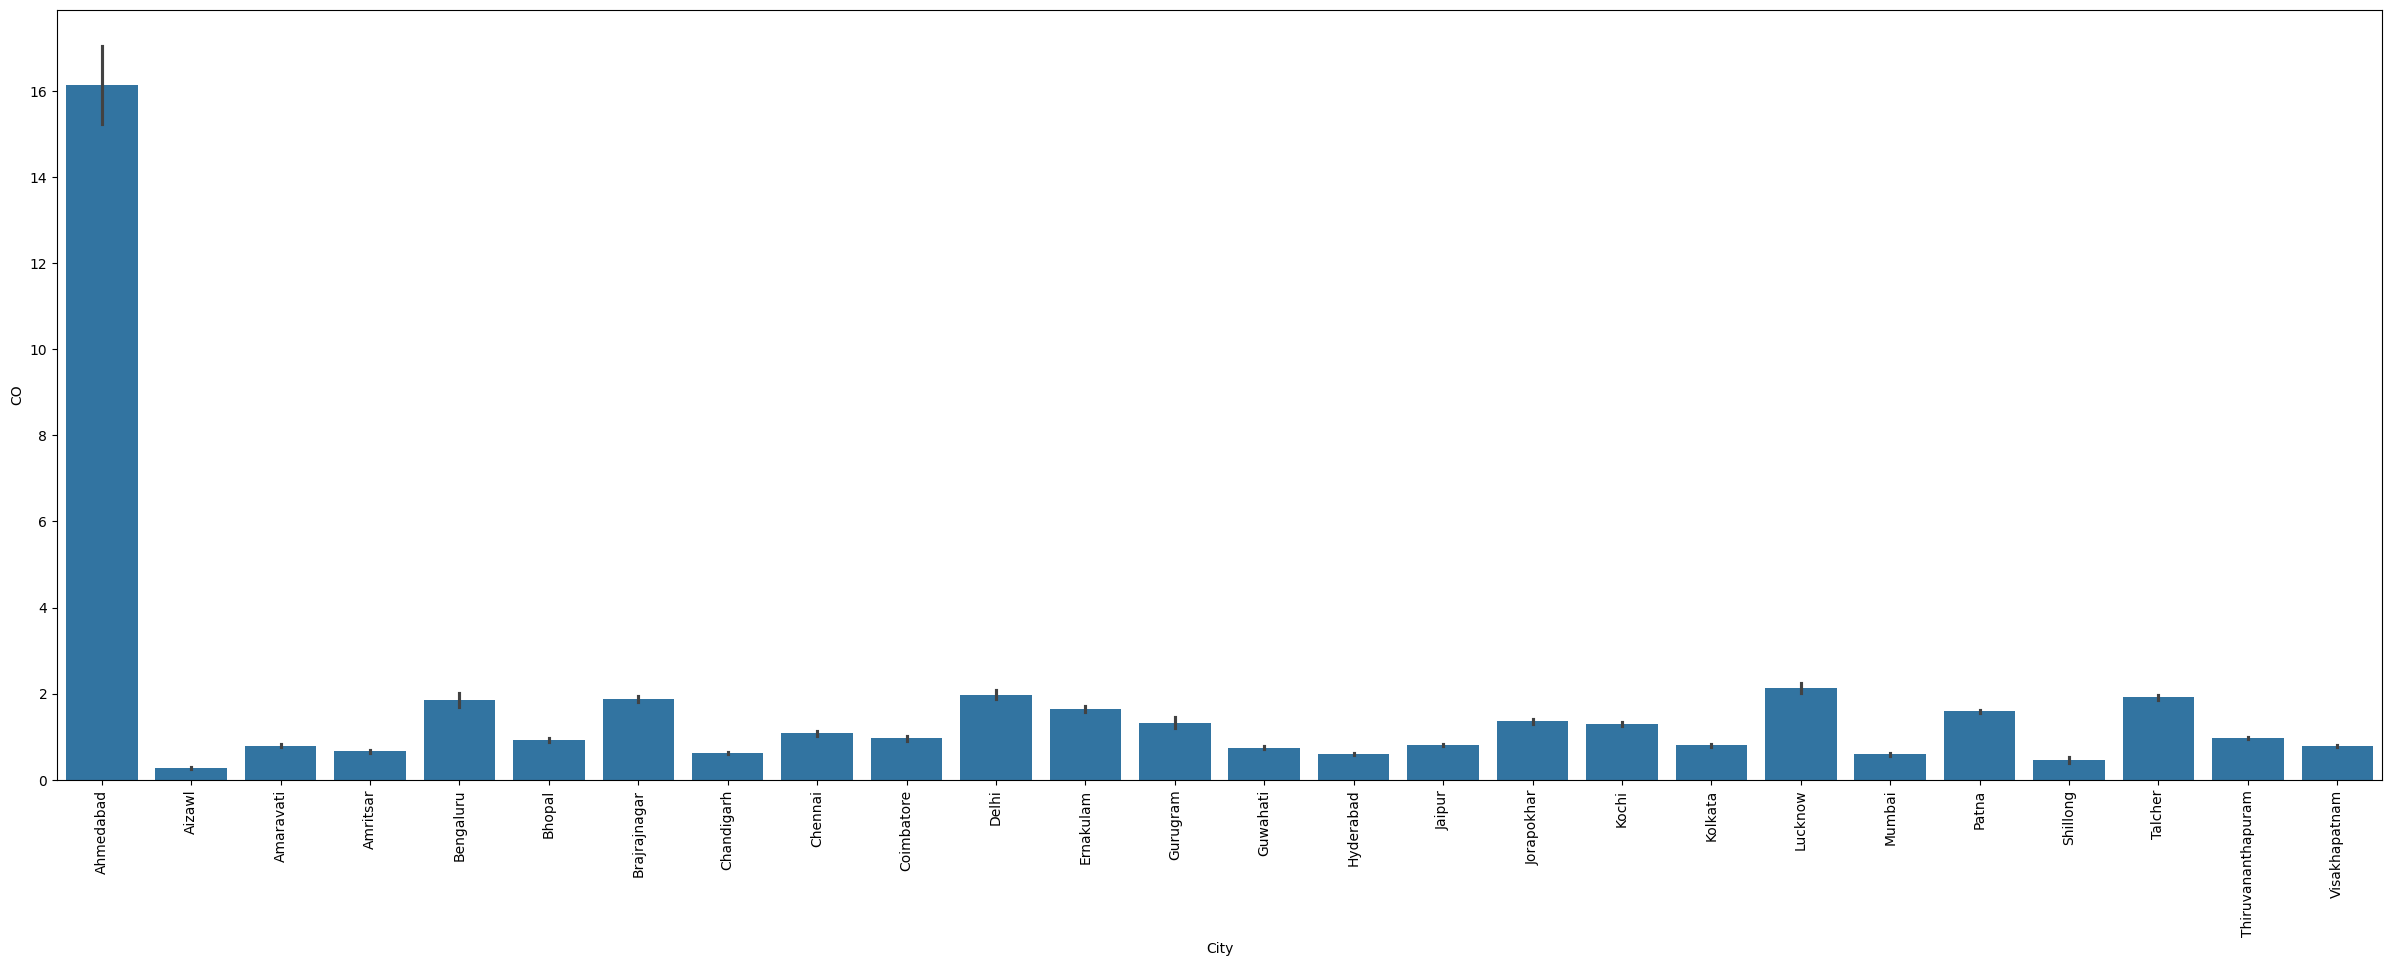

In [121]:
# This visualisation shows the value of CO in each of the states
plt.figure(figsize = (30, 10))
plt.xticks(rotation = 90)
sns.barplot(x = 'City', y = 'CO', data = df)

<Axes: xlabel='City', ylabel='SO2'>

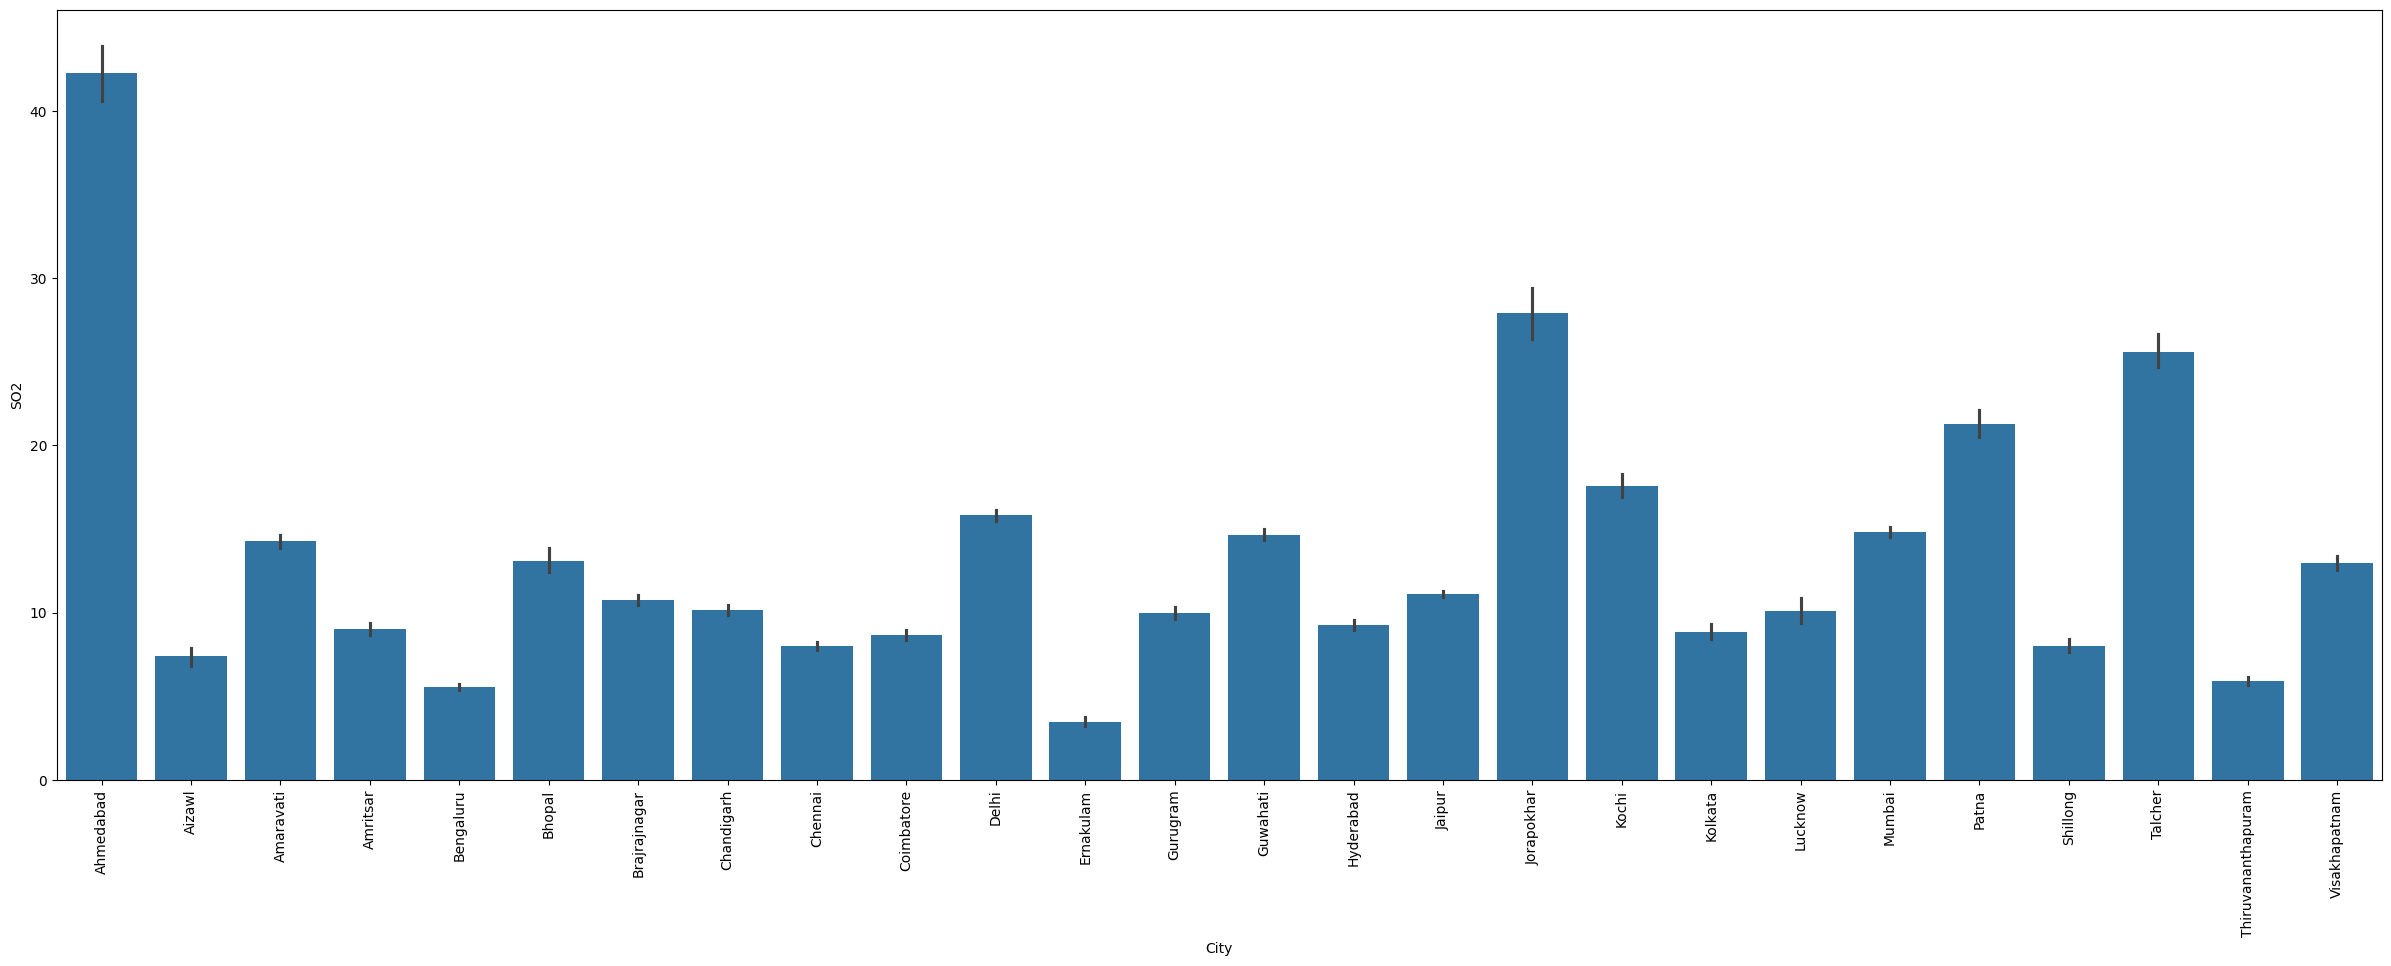

In [122]:
# This visualisation shows the value of SO2 in each of the states
plt.figure(figsize = (30, 10))
plt.xticks(rotation = 90)
sns.barplot(x = 'City', y = 'SO2', data = df)

<Axes: xlabel='City', ylabel='O3'>

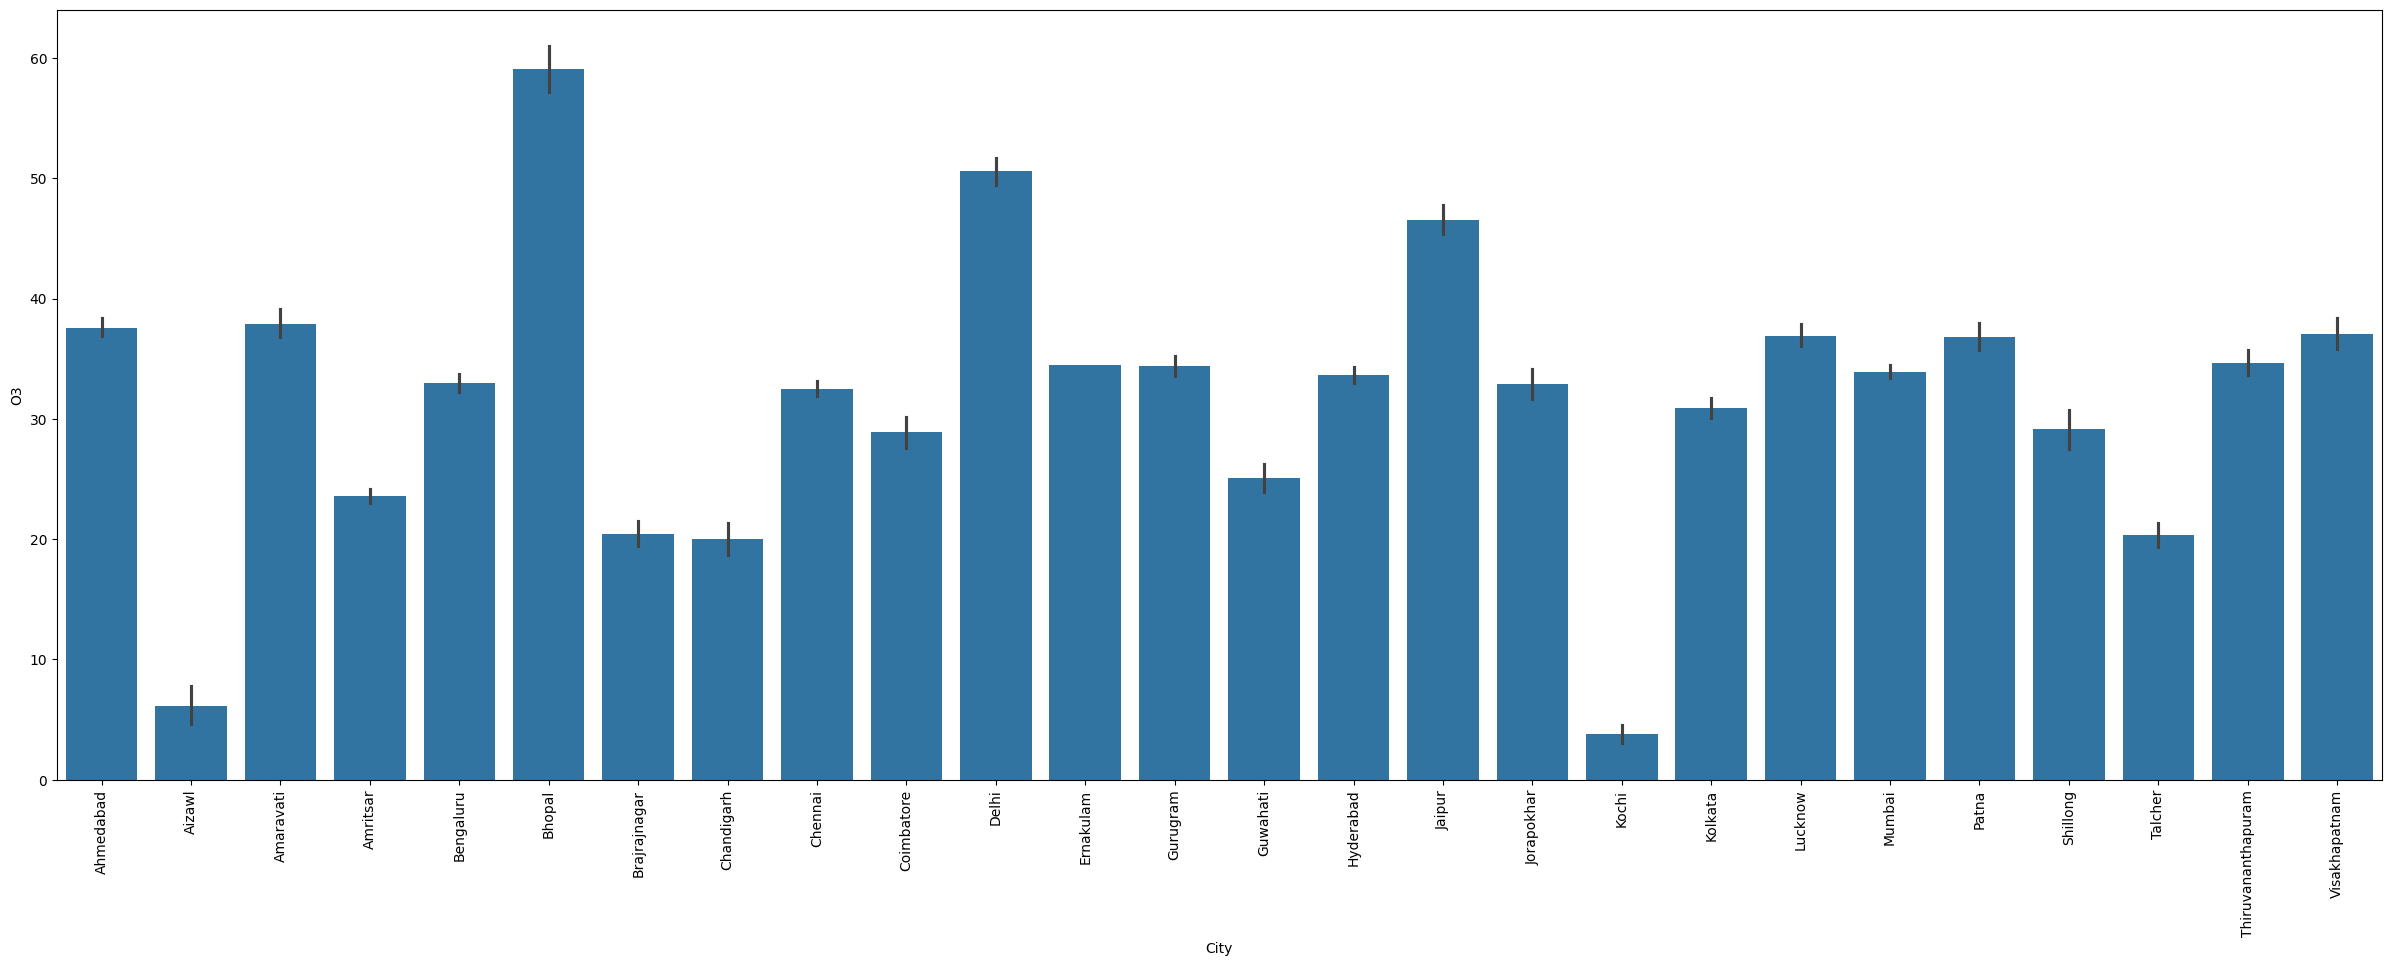

In [123]:
# This visualisation shows the value of O3 in each of the states
plt.figure(figsize = (30, 10))
plt.xticks(rotation = 90)
sns.barplot(x = 'City', y = 'O3', data = df)

<Axes: xlabel='City', ylabel='Benzene'>

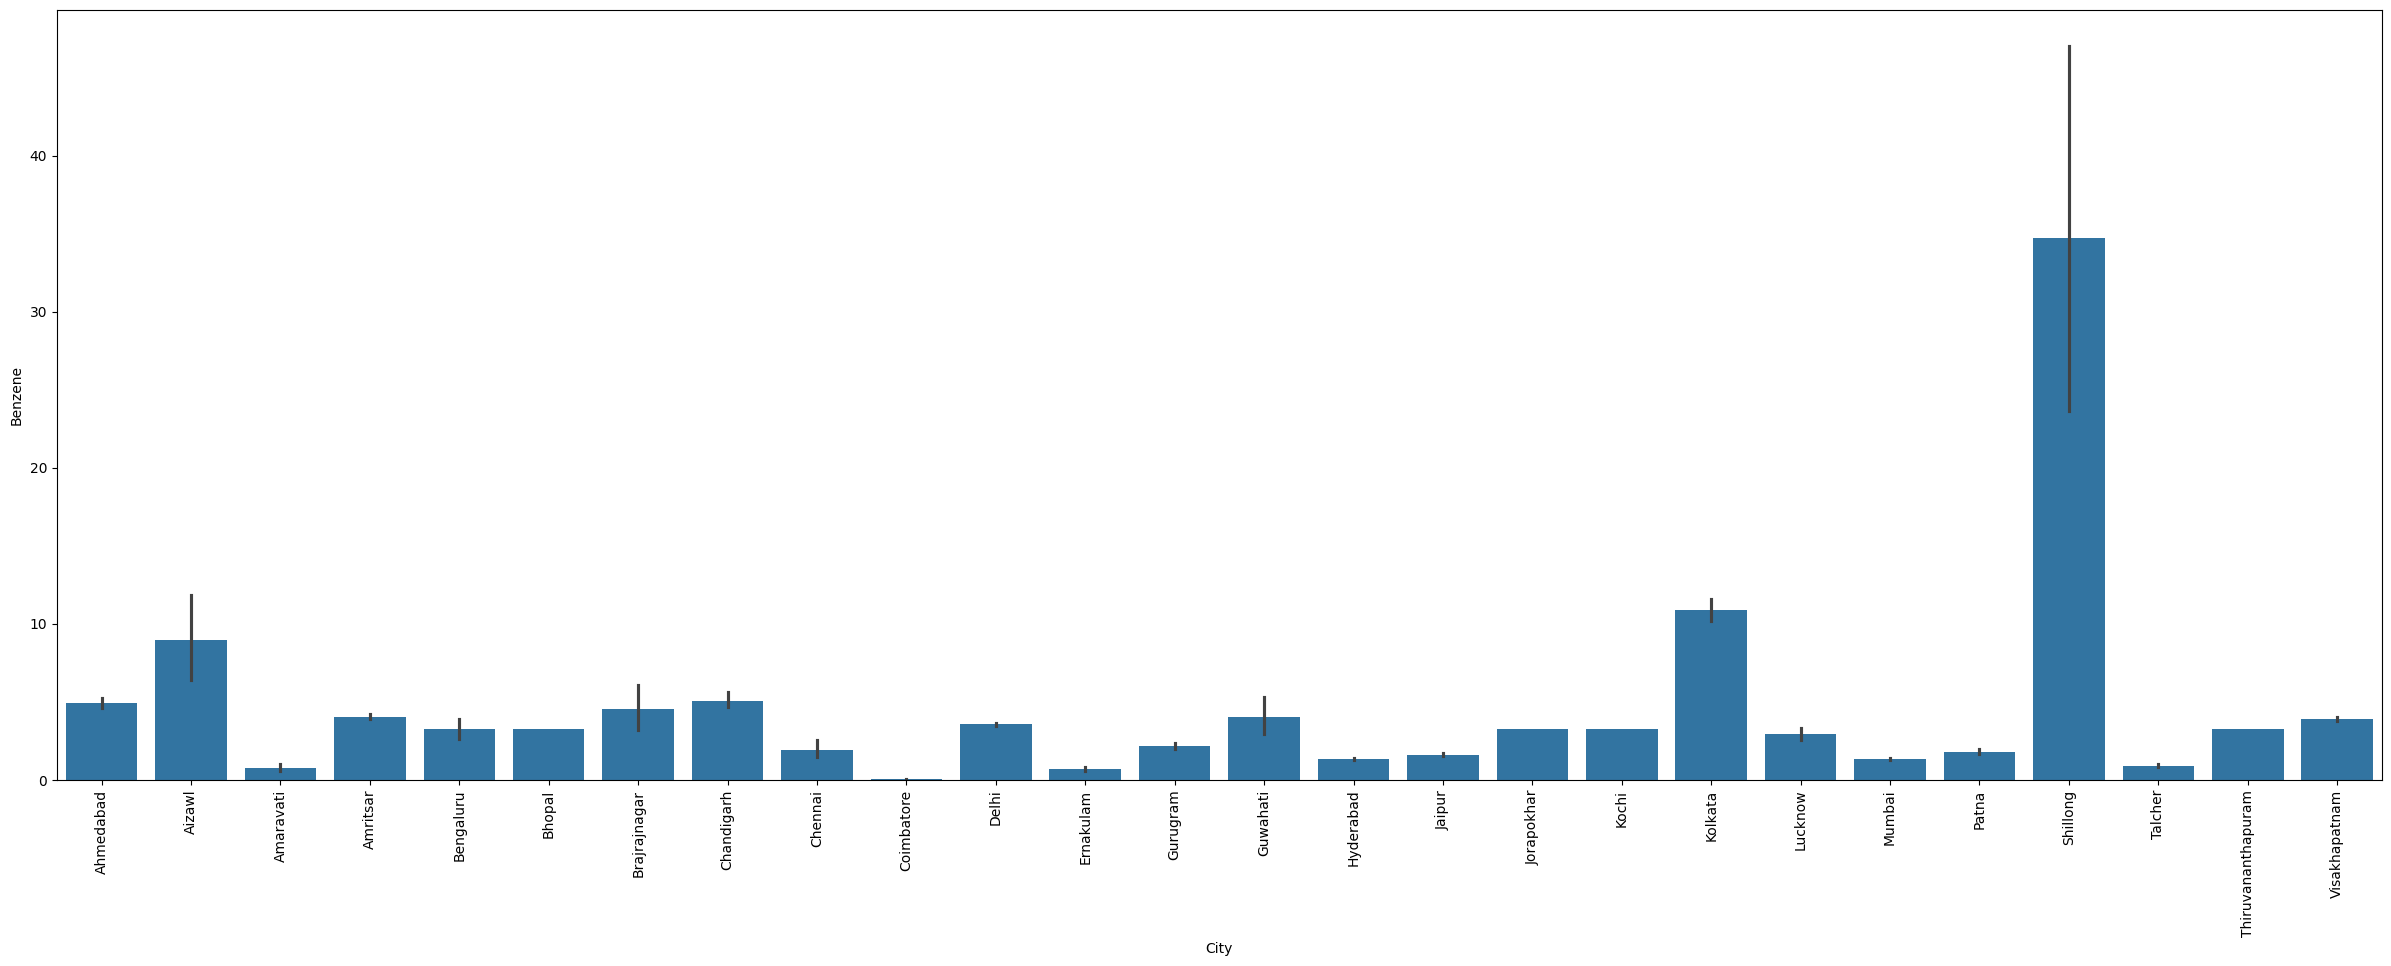

In [124]:
# This visualisation shows the value of Benzene in each of the states
plt.figure(figsize = (30, 10))
plt.xticks(rotation = 90)
sns.barplot(x = 'City', y = 'Benzene', data = df)

<Axes: xlabel='City', ylabel='Toluene'>

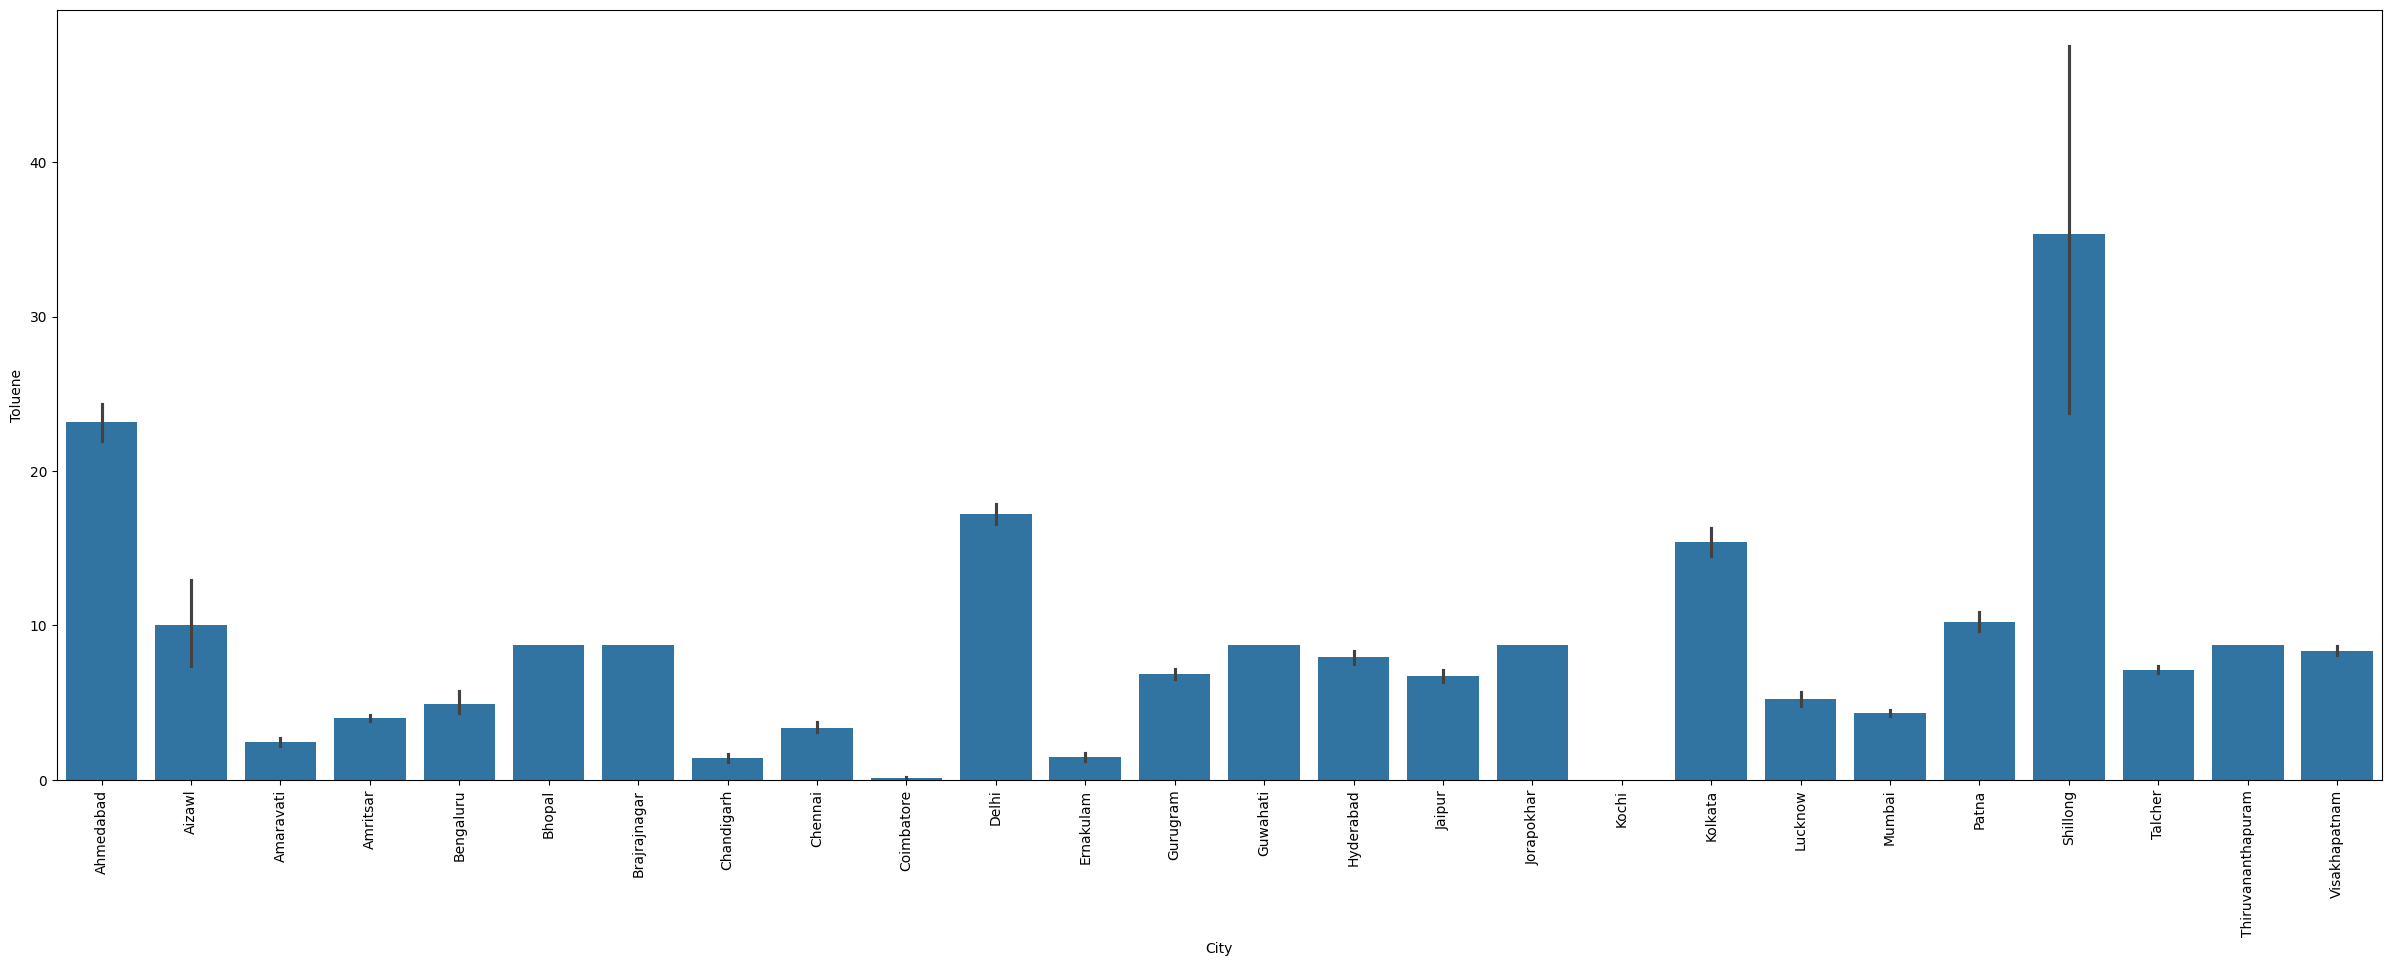

In [125]:
# This visualisation shows the value of Toluene in each of the states
plt.figure(figsize = (30, 10))
plt.xticks(rotation = 90)
sns.barplot(x = 'City', y = 'Toluene', data = df)

<Axes: xlabel='City', ylabel='Xylene'>

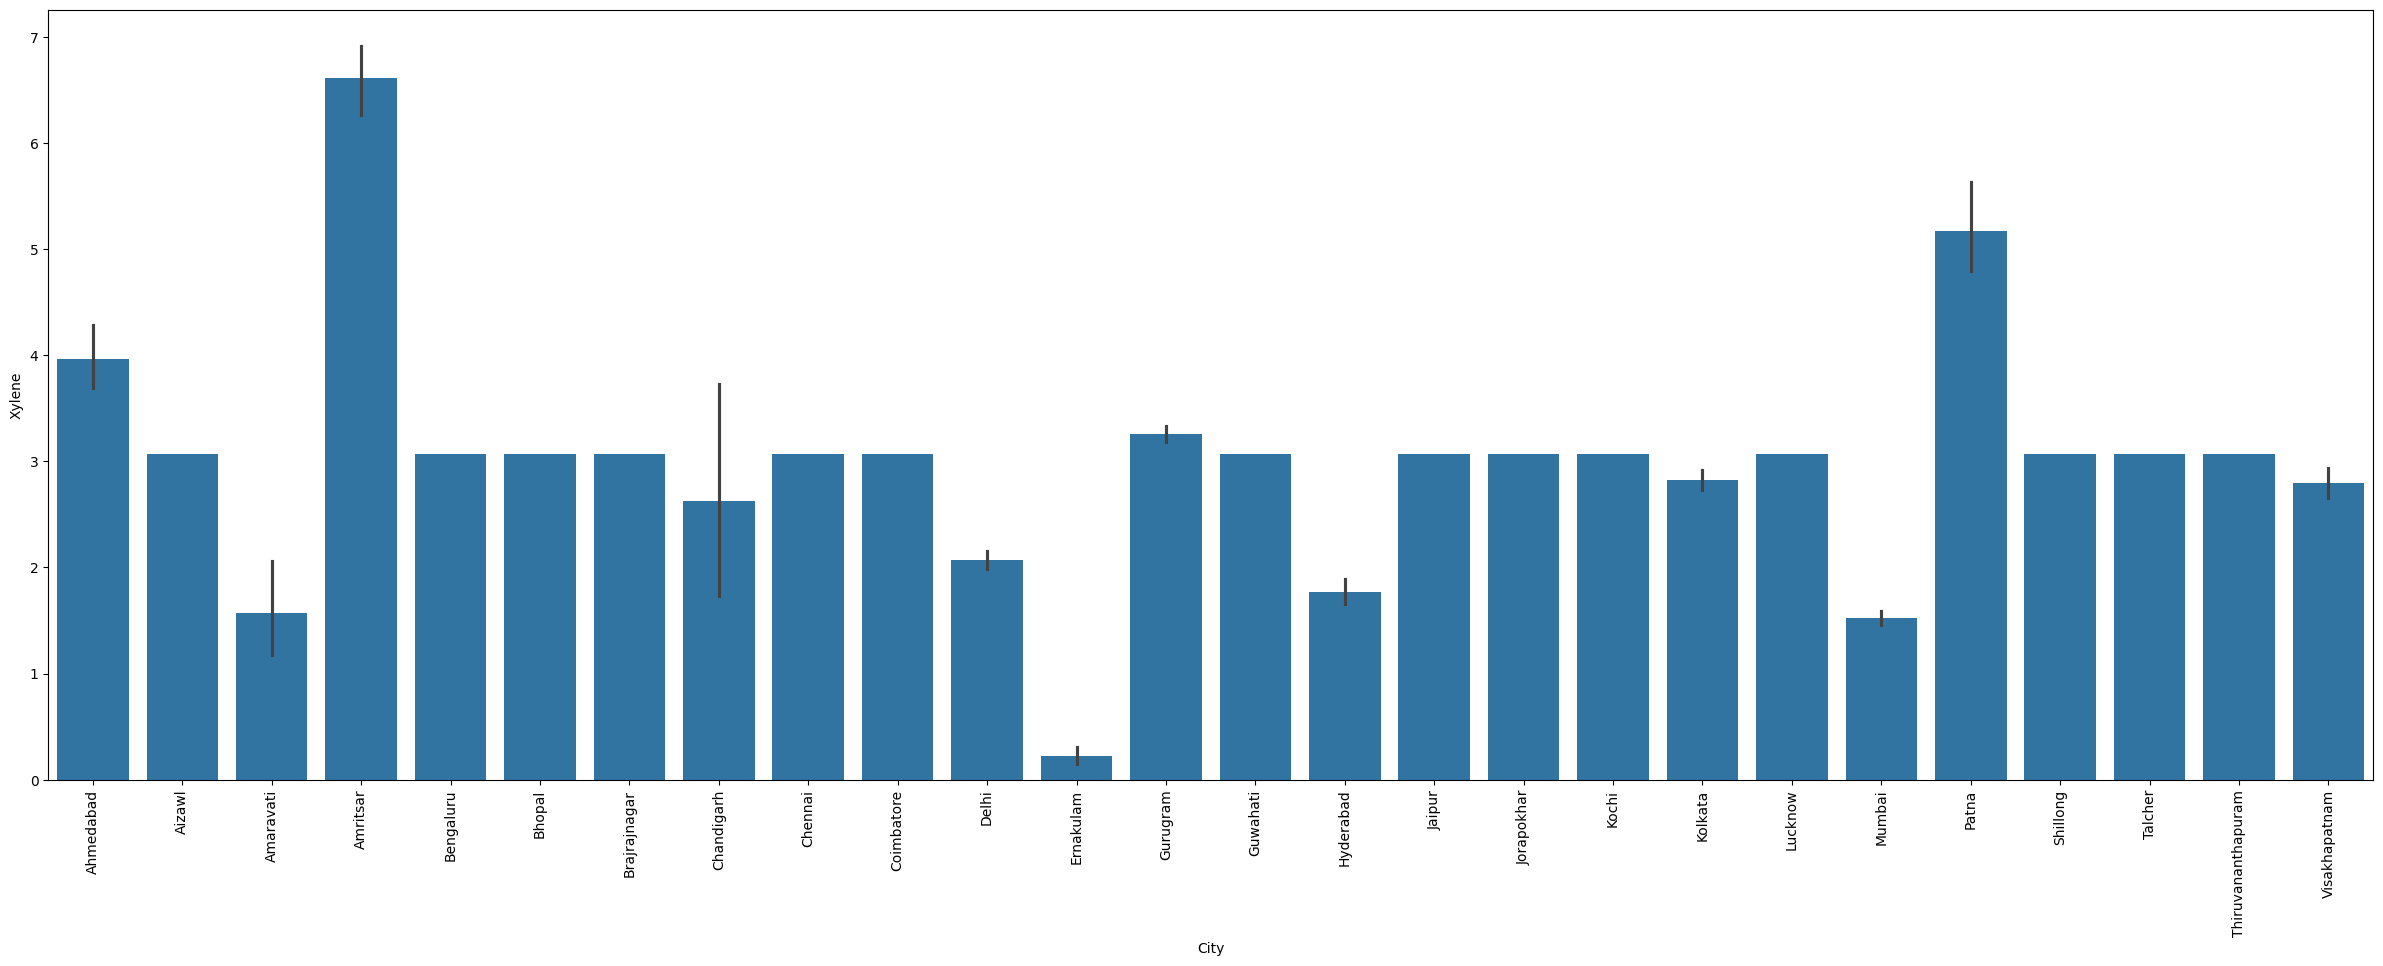

In [126]:
# This visualisation shows the value of Xylene in each of the states
plt.figure(figsize = (30, 10))
plt.xticks(rotation = 90)
sns.barplot(x = 'City', y = 'Xylene', data = df)

In [127]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,166.463581
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,166.463581
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,166.463581
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,166.463581
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,166.463581


In [128]:
df.rename(columns = {'PM2.5':'PM2_5'}, inplace = True)

In [129]:
df

,City,Date,PM2_5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000


In [130]:
# Function to calculate PM2_5 individual pollutant index (PM2.5i)
def cal_PM25i(PM2_5):
    pm25i = 0
    if PM2_5 <= 12.0:
        pm25i = PM2_5 * (50 / 12.0)
    elif 12.1 <= PM2_5 <= 35.4:
        pm25i = 50 + (PM2_5 - 12.1) * (50 / 23.3)
    elif 35.5 <= PM2_5 <= 55.4:
        pm25i = 100 + (PM2_5 - 35.5) * (50 / 19.9)
    elif 55.5 <= PM2_5 <= 150.4:
        pm25i = 150 + (PM2_5 - 55.5) * (50 / 94.9)
    elif 150.5 <= PM2_5 <= 250.4:
        pm25i = 200 + (PM2_5 - 150.5) * (100 / 99.9)
    elif 250.5 <= PM2_5 <= 350.4:
        pm25i = 300 + (PM2_5 - 250.5) * (100 / 99.9)
    elif 350.5 <= PM2_5 <= 500.4:
        pm25i = 400 + (PM2_5 - 350.5) * (100 / 149.9)
    elif PM2_5 > 500.4:
        pm25i = 500
    return pm25i
df['PM25i'] = df['PM2_5'].apply(cal_PM25i)
data = df[['PM2_5', 'PM25i']]
data.head()

,PM2_5,PM25i
0,67.450578,156.296406
1,67.450578,156.296406
2,67.450578,156.296406
3,67.450578,156.296406
4,67.450578,156.296406


In [131]:
# Function to calculate PM10 individual pollutant index (PM10i)
def cal_PM10i(PM10):
    PM10i = 0
    if PM10 <= 50:
        PM10i = PM10 * (50 / 50)
    elif 50 < PM10 <= 100:
        PM10i = 50 + (PM10 - 50) * (50 / 50)
    elif 100 < PM10 <= 250:
        PM10i = 100 + (PM10 - 100) * (100 / 150)
    elif 250 < PM10 <= 350:
        PM10i = 200 + (PM10 - 250) * (100 / 100)
    elif 350 < PM10 <= 430:
        PM10i = 300 + (PM10 - 350) * (100 / 80)
    elif PM10 > 430:
        PM10i = 400 + (PM10 - 430) * (100 / 80)
    return PM10i
df['PM10i'] = df['PM10'].apply(cal_PM10i)
data = df[['PM10', 'PM10i']]
data.head()

,PM10,PM10i
0,118.127103,112.084735
1,118.127103,112.084735
2,118.127103,112.084735
3,118.127103,112.084735
4,118.127103,112.084735


In [132]:
# Function to calculate NO individual pollutant index (NOi)
def cal_NOi(NO):
    NOi = 0
    if NO <= 40:
        NOi = NO * (50 / 40)
    elif 40 < NO <= 80:
        NOi = 50 + (NO - 40) * (50 / 40)
    elif 80 < NO <= 180:
        NOi = 100 + (NO - 80) * (100 / 100)
    elif 180 < NO <= 280:
        NOi = 200 + (NO - 180) * (100 / 100)
    elif 280 < NO <= 565:
        NOi = 300 + (NO - 280) * (100 / 285)
    elif NO > 565:
        NOi = 400 + (NO - 565) * (100 / 235)
    return NOi
df['NOi'] = df['NO'].apply(cal_NOi)
data = df[['NO', 'NOi']]
data.head()

,NO,NOi
0,0.92,1.1500
1,0.97,1.2125
2,17.40,21.7500
3,1.70,2.1250
4,22.10,27.6250


In [133]:
# Function to calculate NO2 individual pollutant index (NO2i)
def cal_NO2i(NO2):
    NO2i = 0
    if NO2 <= 40:
        NO2i = NO2 * (50 / 40)
    elif 40 < NO2 <= 80:
        NO2i = 50 + (NO2 - 40) * (50 / 40)
    elif 80 < NO2 <= 180:
        NO2i = 100 + (NO2 - 80) * (100 / 100)
    elif 180 < NO2 <= 280:
        NO2i = 200 + (NO2 - 180) * (100 / 100)
    elif 280 < NO2 <= 565:
        NO2i = 300 + (NO2 - 280) * (100 / 285)
    elif NO2 > 565:
        NO2i = 400 + (NO2 - 565) * (100 / 235)
    return NO2i
df['NO2i'] = df['NO2'].apply(cal_NO2i)
data = df[['NO2', 'NO2i']]
data.head()

,NO2,NO2i
0,18.22,22.7750
1,15.69,19.6125
2,19.30,24.1250
3,18.48,23.1000
4,21.42,26.7750


In [134]:
# Function to calculate NOx individual pollutant index (NOxi)
def cal_NOxi(NOx):
    NOxi = 0
    if NOx <= 40:
        NOxi = NOx * (50 / 40)
    elif 40 < NOx <= 80:
        NOxi = 50 + (NOx - 40) * (50 / 40)
    elif 80 < NOx <= 180:
        NOxi = 100 + (NOx - 80) * (100 / 100)
    elif 180 < NOx <= 280:
        NOxi = 200 + (NOx - 180) * (100 / 100)
    elif 280 < NOx <= 565:
        NOxi = 300 + (NOx - 280) * (100 / 285)
    elif NOx > 565:
        NOxi = 400 + (NOx - 565) * (100 / 235)
    return NOxi
df['NOxi'] = df['NOx'].apply(cal_NOxi)
data = df[['NOx', 'NOxi']]
data.head()

,NOx,NOxi
0,17.15,21.4375
1,16.46,20.5750
2,29.70,37.1250
3,17.97,22.4625
4,37.76,47.2000


In [135]:
# Function to calculate NH3 individual pollutant index (NH3i)
def cal_NH3i(NH3):
    NH3i = 0
    if NH3 <= 200:
        NH3i = NH3 * (50 / 200)
    elif 200 < NH3 <= 400:
        NH3i = 50 + (NH3 - 200) * (50 / 200)
    elif 400 < NH3 <= 800:
        NH3i = 100 + (NH3 - 400) * (100 / 400)
    elif 800 < NH3 <= 1200:
        NH3i = 200 + (NH3 - 800) * (100 / 400)
    elif 1200 < NH3 <= 1800:
        NH3i = 300 + (NH3 - 1200) * (100 / 600)
    elif NH3 > 1800:
        NH3i = 400 + (NH3 - 1800) * (100 / 600)
    return NH3i
df['NH3i'] = df['NH3'].apply(cal_NH3i)
data = df[['NH3', 'NH3i']]
data.head()

,NH3,NH3i
0,23.483476,5.870869
1,23.483476,5.870869
2,23.483476,5.870869
3,23.483476,5.870869
4,23.483476,5.870869


In [136]:
# Function to calculate CO individual pollutant index (CO)
def cal_COi(CO):
    COi = 0
    if CO <= 4.4:
        COi = CO * (50 / 4.4)
    elif 4.5 <= CO <= 9.4:
        COi = 50 + (CO - 4.5) * (50 / 4.9)
    elif 9.5 <= CO <= 12.4:
        COi = 100 + (CO - 9.5) * (100 / 2.9)
    elif 12.5 <= CO <= 15.4:
        COi = 200 + (CO - 12.5) * (100 / 2.9)
    elif 15.5 <= CO <= 30.4:
        COi = 300 + (CO - 15.5) * (100 / 14.9)
    elif CO > 30.4:
        COi = 400 + (CO - 30.4) * (100 / 14.9)
    return COi
df['COi'] = df['CO'].apply(cal_COi)
data = df[['CO', 'COi']]
data.head()

,CO,COi
0,0.92,10.454545
1,0.97,11.022727
2,17.40,312.751678
3,1.70,19.318182
4,22.10,344.295302


In [137]:
# Function to calculate SO2 individual pollutant index (SO2i)
def cal_SO2i(SO2):
    SO2i = 0
    if SO2 <= 50:
        SO2i = SO2 * (50 / 50)
    elif 50 < SO2 <= 100:
        SO2i = 50 + (SO2 - 50) * (50 / 50)
    elif 100 < SO2 <= 200:
        SO2i = 100 + (SO2 - 100) * (100 / 100)
    elif 200 < SO2 <= 300:
        SO2i = 200 + (SO2 - 200) * (100 / 100)
    elif 300 < SO2 <= 400:
        SO2i = 300 + (SO2 - 300) * (100 / 100)
    elif SO2 > 400:
        SO2i = 400 + (SO2 - 400) * (100 / 100)
    return SO2i
df['SO2i'] = df['SO2'].apply(cal_SO2i)
data = df[['SO2', 'SO2i']]
data.head()

,SO2,SO2i
0,27.64,27.64
1,24.55,24.55
2,29.07,29.07
3,18.59,18.59
4,39.33,39.33


In [138]:
# Function to calculate O3 individual pollutant index (O3i)
def cal_O3i(O3):
    O3i = 0
    if O3 <= 50:
        O3i = O3 * (50 / 50)
    elif 50 < O3 <= 100:
        O3i = 50 + (O3 - 50) * (50 / 50)
    elif 100 < O3 <= 168:
        O3i = 100 + (O3 - 100) * (100 / 68)
    elif 168 < O3 <= 208:
        O3i = 200 + (O3 - 168) * (100 / 40)
    elif 208 < O3 <= 748:
        O3i = 300 + (O3 - 208) * (100 / 540)
    elif O3i > 748:
        O3i = 400 + (O3 - 748) * (100 / 540)
    return O3i
df['O3i'] = df['O3'].apply(cal_O3i)
data = df[['O3', 'O3i']]
data.head()

,O3,O3i
0,133.36,149.058824
1,34.06,34.060000
2,30.70,30.700000
3,36.08,36.080000
4,39.31,39.310000


In [139]:
# Function to calculate Benzene individual pollutant index (Benzene_i)
def cal_Benzene_i(Benzene):
    Benzene_i = 0
    if Benzene <= 5:
        Benzene_i = Benzene * (50 / 5)
    elif 5 < Benzene <= 10:
        Benzene_i = 50 + (Benzene - 5) * (50 / 5)
    elif 10 < Benzene <= 15:
        Benzene_i = 100 + (Benzene - 10) * (100 / 5)
    elif 15 < Benzene <= 20:
        Benzene_i = 200 + (Benzene - 15) * (100 / 5)
    elif 20 < Benzene <= 25:
        Benzene_i = 300 + (Benzene - 20) * (100 / 5)
    elif Benzene > 25:
        Benzene_i = 400 + (Benzene - 25) * (100 / 5)
    return Benzene_i
df['Benzene_i'] = df['Benzene'].apply(cal_Benzene_i)
data = df[['Benzene', 'Benzene_i']]
data.head()

,Benzene,Benzene_i
0,0.00,0.0
1,3.68,36.8
2,6.80,68.0
3,4.43,44.3
4,7.01,70.1


In [140]:
# Function to calculate Xylene individual pollutant index (xi)
def cal_Xi(Xylene):
    xi = 0
    if Xylene <= 5:
        xi = Xylene * (50 / 5)
    elif Xylene > 5 and Xylene <= 10:
        xi = 50 + (Xylene - 5) * (50 / 5)
    elif Xylene > 10 and Xylene <= 25:
        xi = 100 + (Xylene - 10) * (100 / 15)
    elif Xylene > 25 and Xylene <= 50:
        xi = 200 + (Xylene - 25) * (100 / 25)
    elif Xylene > 50 and Xylene <= 100:
        xi = 300 + (Xylene - 50) * (100 / 50)
    elif Xylene > 100:
        xi = 400 + (Xylene - 100) * (100 / 100)
    return xi
df['xi'] = df['Xylene'].apply(cal_Xi)
data = df[['Xylene', 'xi']]
data.head()

,Xylene,xi
0,0.00,0.0
1,3.77,37.7
2,2.25,22.5
3,1.00,10.0
4,2.78,27.8


In [141]:
# Function to calculaye toluene individual pollutant index (TI)
def cal_TI(Toluene):
    TI = 0
    if Toluene <= 10:
        ti = Toluene * (50 / 10)
    elif Toluene > 10 and Toluene <= 20:
        TI = 50 + (Toluene - 10) * (50 / 10)
    elif Toluene > 20 and Toluene <= 50:
        TI = 100 + (Toluene - 20) * (100 / 30)
    elif Toluene > 50 and Toluene <= 100:
        TI = 200 + (Toluene - 50) * (100 / 50)
    elif Toluene > 100 and Toluene <= 200:
        TI = 300 + (Toluene - 100) * (100 / 100)
    elif Toluene > 200:
        TI = 400 + (Toluene - 200) * (100 / 200)
    return TI
df['TI'] = df['Toluene'].apply(cal_TI)
data = df[['Toluene', 'TI']]
data.head()

,Toluene,TI
0,0.02,0.00
1,5.50,0.00
2,16.40,82.00
3,10.14,50.70
4,18.89,94.45


In [142]:
print(df.columns)

Index(['City', 'Date', 'PM2_5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'PM25i', 'PM10i', 'NOi',
       'NO2i', 'NOxi', 'NH3i', 'COi', 'SO2i', 'O3i', 'Benzene_i', 'xi', 'TI'],
      dtype='object')


In [143]:
# Function to calculate the air quality index (AQI) of every data value
def cal_aqi(pm25i, pm10i,  NOi, NO2i, NOxi, NH3i, COi, SO2i, O3i, Benzene_i, xi, TI):
  aqi = 0
  if(pm25i>pm10i and pm25i > NOi and pm25i > NO2i and pm25i > NOxi and pm25i > NH3i and pm25i > COi and pm25i > SO2i and pm25i > O3i and pm25i > Benzene_i  and pm25i > TI and pm25i > xi):
    aqi = pm25i
  if(pm10i > pm25i and pm10i > NOi and pm10i > NO2i and pm10i>NOxi and pm10i > NH3i and pm10i > COi and pm10i > SO2i and pm10i > O3i and pm10i > Benzene_i and pm10i > xi and pm10i > TI):
    aqi = pm10i
  if(NOi > pm25i and NOi > pm10i and NOi > NO2i and NOi>NOxi and NOi > NH3i and NOi > COi and NOi > SO2i and NOi > O3i and NOi > Benzene_i and NOi > xi and NOi > TI):
    aqi = NOi
  if(NO2i > pm25i and NO2i > pm10i and NO2i > NOi and NO2i>NOxi and NO2i > NH3i and NO2i > COi and NO2i > SO2i and NO2i > O3i and NO2i > Benzene_i and NO2i > xi and NO2i > TI):
    aqi = NO2i
  if(NOxi > pm25i and NOxi > pm10i and NOxi > NOi and NOxi>NO2i and NOxi > NH3i and NOxi > COi and NOxi > SO2i and NOxi > O3i and NOxi > Benzene_i and NOxi > xi and NOxi > TI):
    aqi = NOxi
  if(NH3i > pm25i and NH3i > pm10i and NH3i > NOi and NH3i>NOxi and NH3i > NO2i and NH3i > COi and NH3i > SO2i and NH3i > O3i and NH3i > Benzene_i and NH3i > xi and NH3i > TI):
    aqi = NH3i
  if(COi > pm25i and COi > pm10i and COi > NOi and COi>NOxi and COi > NH3i and COi > NO2i and COi > SO2i and COi > O3i and COi > Benzene_i and COi > xi and COi > TI):
    aqi = COi
  if(SO2i > pm25i and SO2i > pm10i and SO2i > NOi and SO2i >NOxi and SO2i > NH3i and SO2i > COi and SO2i > NO2i and SO2i > O3i and SO2i > Benzene_i and SO2i > xi and SO2i > TI):
    aqi = SO2i
  if(O3i > pm25i and O3i > pm10i and O3i > NOi and O3i>NOxi and O3i > NH3i and O3i > COi and O3i > SO2i and O3i > NO2i and O3i > Benzene_i and O3i > xi and O3i > TI):
    aqi = O3i
  if(Benzene_i > pm25i and Benzene_i > pm10i and Benzene_i > NOi and Benzene_i >NOxi and Benzene_i > NH3i and Benzene_i > COi and Benzene_i > SO2i and Benzene_i > O3i and Benzene_i > NO2i and Benzene_i > xi and Benzene_i > TI):
    aqi = Benzene_i
  if(xi > pm25i and xi > pm10i and xi > NOi and xi >NOxi and xi > NH3i and xi > COi and xi > SO2i and xi > O3i and xi > NO2i and xi > Benzene_i and xi > TI):
    aqi = xi
  if(TI > pm25i and TI > pm10i and TI > NOi and TI >NOxi and TI > NH3i and TI > COi and TI > SO2i and TI > O3i and TI > NO2i and TI > xi and TI > Benzene_i):
    aqi = TI
  return aqi

df['NEW_AQI'] = df.apply(lambda p: cal_aqi(
        p['PM25i'], p['PM10i'], p['NOi'], p['NO2i'], p['NOxi'],
        p['NH3i'], p['COi'], p['SO2i'], p['O3i'], p['Benzene_i'],
        p['xi'], p['TI']
    ),
    axis=1
)
data = df[['City', 'PM25i', 'PM10i', 'NOi', 'NO2i', 'NOxi','NH3i', 'COi', 'SO2i', 'O3i', 'Benzene_i', 'xi', 'TI', 'NEW_AQI']]
data.head()



,City,PM25i,PM10i,NOi,NO2i,NOxi,NH3i,COi,SO2i,O3i,Benzene_i,xi,TI,NEW_AQI
0,Ahmedabad,156.296406,112.084735,1.1500,22.7750,21.4375,5.870869,10.454545,27.64,149.058824,0.0,0.0,0.00,156.296406
1,Ahmedabad,156.296406,112.084735,1.2125,19.6125,20.5750,5.870869,11.022727,24.55,34.060000,36.8,37.7,0.00,156.296406
2,Ahmedabad,156.296406,112.084735,21.7500,24.1250,37.1250,5.870869,312.751678,29.07,30.700000,68.0,22.5,82.00,312.751678
3,Ahmedabad,156.296406,112.084735,2.1250,23.1000,22.4625,5.870869,19.318182,18.59,36.080000,44.3,10.0,50.70,156.296406
4,Ahmedabad,156.296406,112.084735,27.6250,26.7750,47.2000,5.870869,344.295302,39.33,39.310000,70.1,27.8,94.45,344.295302


In [144]:
# using threshold values to classify a particular values as good, moderate,poor, unhealthy, very unhealthy, hazardous
def AQI_Range(x):
  if x <= 50:
    return "Good"
  elif x>50 and x<=100:
    return "Moderate"
  elif x>100 and x<=200:
    return "Poor"
  elif x>200 and x<=300:
    return "Unhealthy"
  elif x>300 and x<=400:
    return "Very Unhealthy"
  elif x>400:
    return "Hazardous"

df ['AQI_Range'] = df['NEW_AQI'].apply(AQI_Range)
df.head()

,City,Date,PM2_5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,NOxi,NH3i,COi,SO2i,O3i,Benzene_i,xi,TI,NEW_AQI,AQI_Range
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,...,21.4375,5.870869,10.454545,27.64,149.058824,0.0,0.0,0.00,156.296406,Poor
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,...,20.5750,5.870869,11.022727,24.55,34.060000,36.8,37.7,0.00,156.296406,Poor
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,...,37.1250,5.870869,312.751678,29.07,30.700000,68.0,22.5,82.00,312.751678,Very Unhealthy
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,...,22.4625,5.870869,19.318182,18.59,36.080000,44.3,10.0,50.70,156.296406,Poor
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,...,47.2000,5.870869,344.295302,39.33,39.310000,70.1,27.8,94.45,344.295302,Very Unhealthy


In [145]:
# splitting the dataset into dependent and independent columns
X = df[['PM25i', 'PM10i', 'NOi', 'NO2i', 'NOxi',	'NH3i',	'COi'	, 'SO2i',	'O3i','Benzene_i', 'xi', 'TI']]
y = df['NEW_AQI']

In [146]:
X.head()

,PM25i,PM10i,NOi,NO2i,NOxi,NH3i,COi,SO2i,O3i,Benzene_i,xi,TI
0,156.296406,112.084735,1.1500,22.7750,21.4375,5.870869,10.454545,27.64,149.058824,0.0,0.0,0.00
1,156.296406,112.084735,1.2125,19.6125,20.5750,5.870869,11.022727,24.55,34.060000,36.8,37.7,0.00
2,156.296406,112.084735,21.7500,24.1250,37.1250,5.870869,312.751678,29.07,30.700000,68.0,22.5,82.00
3,156.296406,112.084735,2.1250,23.1000,22.4625,5.870869,19.318182,18.59,36.080000,44.3,10.0,50.70
4,156.296406,112.084735,27.6250,26.7750,47.2000,5.870869,344.295302,39.33,39.310000,70.1,27.8,94.45


In [147]:
y.head()

0    156.296406
1    156.296406
2    312.751678
3    156.296406
4    344.295302
Name: NEW_AQI, dtype: float64

In [148]:
# splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 70)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23624, 12) (5907, 12) (23624,) (5907,)


In [149]:
X_train

,PM25i,PM10i,NOi,NO2i,NOxi,NH3i,COi,SO2i,O3i,Benzene_i,xi,TI
18371,173.087460,165.320000,12.0500,12.6000,40.386404,1.607500,0.000000,14.531977,103.882353,32.808403,30.701278,0.000000
4055,193.008430,180.973333,21.2125,12.4375,33.387500,3.247500,5.454545,10.680000,18.850000,21.400000,20.000000,0.000000
6917,156.296406,103.020000,21.0750,25.3875,39.500000,4.305000,5.113636,12.820000,9.470000,6.200000,30.701278,0.000000
3808,75.042918,56.260000,10.6500,20.5250,31.112500,1.532500,2.386364,14.531977,17.420000,44.100000,25.700000,0.000000
5749,152.044257,100.313333,12.5875,42.1250,42.350000,4.152500,11.477273,5.270000,55.220000,7.100000,30.701278,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
25916,68.369099,35.480000,1.1625,3.6375,1.525000,0.745000,1.931818,3.940000,60.410000,8250.200000,30.701278,508.755000
12056,376.616617,411.637500,140.7600,81.0000,163.710000,14.565000,37.727273,19.950000,36.500000,93.600000,26.500000,246.220000
21618,237.597598,112.084735,52.7000,83.2250,87.750000,4.087500,14.431818,14.770000,32.970000,43.800000,30.701278,108.166667
28886,97.403433,102.826667,21.1375,48.7125,43.112500,2.050000,7.386364,3.820000,22.360000,56.100000,42.300000,57.000000


In [150]:
X_test

,PM25i,PM10i,NOi,NO2i,NOxi,NH3i,COi,SO2i,O3i,Benzene_i,xi,TI
6500,156.296406,112.084735,21.968412,35.700824,40.386404,5.870869,25.552252,14.531977,34.49143,32.808403,30.701278,0.0
29096,70.987124,60.430000,17.075000,28.425000,29.000000,1.315000,6.818182,2.760000,8.57000,18.700000,5.600000,0.0
23952,156.296406,112.084735,38.987500,21.275000,60.225000,5.870869,16.477273,6.530000,9.83000,3.300000,9.700000,0.0
24426,326.446446,112.084735,52.150000,41.037500,93.200000,5.870869,27.954545,1.710000,13.86000,3.100000,5.700000,0.0
21034,208.228228,112.084735,46.475000,102.930000,80.750000,7.515000,6.136364,12.520000,29.04000,0.000000,30.701278,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27731,44.291667,35.980000,1.200000,4.700000,2.637500,0.382500,18.977273,1.230000,20.01000,32.808403,30.701278,0.0
4761,103.718593,151.880000,4.825000,18.387500,12.012500,4.317500,14.204545,3.100000,74.34000,24.400000,30.701278,0.0
27778,52.832618,29.570000,1.200000,4.175000,2.400000,0.302500,9.090909,0.630000,19.00000,32.808403,30.701278,0.0
19904,156.296406,112.084735,9.075000,17.287500,6.750000,5.870869,158.965517,14.531977,15.43000,22.400000,30.701278,0.0


In [151]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [152]:
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

In [153]:
train_results = pd.DataFrame({
    'Actual': y_train,
    'Predicted': train_pred
})

test_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': test_pred
})

In [154]:
print("Training Data Predictions:")
print(train_results)

print("\nTesting Data Predictions:")
print(test_results)

Training Data Predictions:
            Actual    Predicted
18371   173.087460   194.585112
4055    193.008430   212.537820
6917    156.296406   137.647052
3808     75.042918   100.671916
5749    152.044257   135.831964
...            ...          ...
25916  8250.200000  8001.850411
12056   411.637500   459.785767
21618   237.597598   213.388857
28886   102.826667   133.224817
23886   156.296406   149.654485

[23624 rows x 2 columns]

Testing Data Predictions:
           Actual   Predicted
6500   156.296406  178.201010
29096   70.987124   84.228884
23952  156.296406  148.665627
24426  326.446446  268.136760
21034  208.228228  166.231475
...           ...         ...
27731   44.291667   73.888547
4761   151.880000  146.291995
27778   52.832618   71.685419
19904  158.965517  249.268609
2229   115.502513  107.972194

[5907 rows x 2 columns]


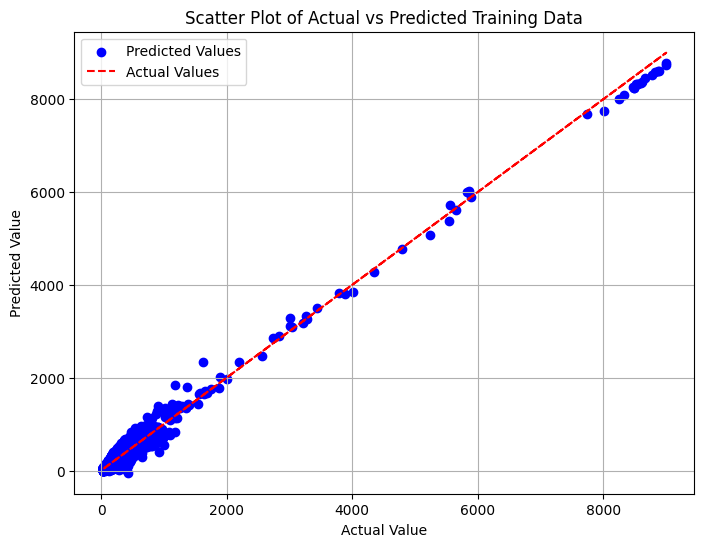

In [155]:
# Visualization of the Actual and Predicted training dataset
train_results = pd.DataFrame({
    'Actual': y_train,
    'Predicted': train_pred
})

# Plotting
plt.figure(figsize=(8, 6))

# Plot scatter plot for actual vs predicted values
plt.scatter(train_results['Actual'], train_results['Predicted'], color='blue', label='Predicted Values')

# Add a diagonal line for comparison
plt.plot(train_results['Actual'], train_results['Actual'], color='red', linestyle='--', label='Actual Values')

# Add title and labels
plt.title('Scatter Plot of Actual vs Predicted Training Data')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()

plt.grid(True)
plt.show()

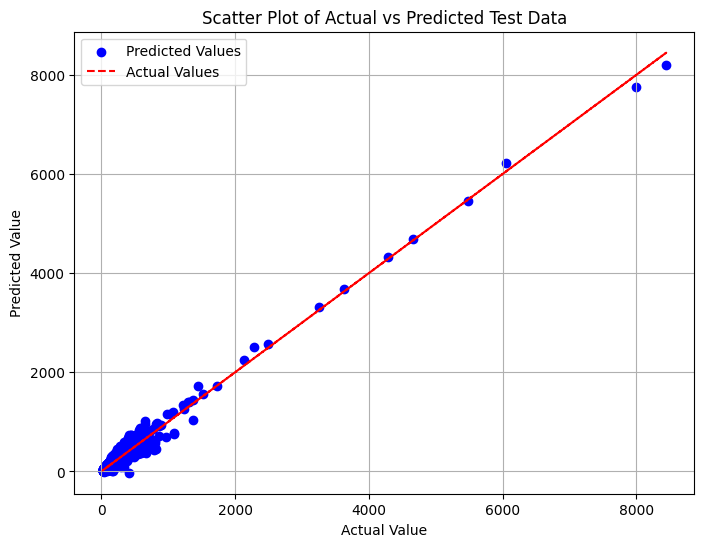

In [156]:
# Visualisation of the Actual and Predicted Testing dataset
test_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': test_pred
})

# Plotting
plt.figure(figsize=(8, 6))

# Plot scatter plot for actual vs predicted values
plt.scatter(test_results['Actual'], test_results['Predicted'], color='blue', label = 'Predicted Values')

# Add a diagonal line for comparison
plt.plot(test_results['Actual'], test_results['Actual'], color='red', linestyle='--', label = 'Actual Values')

# Add title and labels
plt.title('Scatter Plot of Actual vs Predicted Test Data')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [157]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print("RMSE TrainingData = ", str(RMSE_train))
print("RMSE TestData = ", str(RMSE_test))
print('_'*50)
print("RSquared value on train:", lr.score(X_train, y_train))
print("RSquared value on test:", lr.score(X_test, y_test))

RMSE TrainingData =  40.45395945127248
RMSE TestData =  40.891721891025625
__________________________________________________
RSquared value on train: 0.9803658061927496
RSquared value on test: 0.9705767206582385


In [158]:
# Decision Tree
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

DecisionTreeRegressor()

In [159]:
train_preds = DT.predict(X_train)
test_preds = DT.predict(X_test)

In [160]:
train_results1 = pd.DataFrame({
    'Actual': y_train,
    'Predicted': train_preds
})


test_results1 = pd.DataFrame({
    'Actual': y_test,
    'Predicted': test_preds
})

In [161]:
print("Training Data Predictions:")
print(train_results1)

print("\nTesting Data Predictions:")
print(test_results1)

Training Data Predictions:
            Actual    Predicted
18371   173.087460   173.087460
4055    193.008430   193.008430
6917    156.296406   156.296405
3808     75.042918    75.042918
5749    152.044257   152.044257
...            ...          ...
25916  8250.200000  8250.200000
12056   411.637500   411.637500
21618   237.597598   237.597598
28886   102.826667   102.826667
23886   156.296406   156.296405

[23624 rows x 2 columns]

Testing Data Predictions:
           Actual   Predicted
6500   156.296406  156.296405
29096   70.987124   70.944206
23952  156.296406  156.296405
24426  326.446446  326.266266
21034  208.228228  208.088088
...           ...         ...
27731   44.291667   44.250000
4761   151.880000  151.306667
27778   52.832618   52.832618
19904  158.965517  166.896552
2229   115.502513  115.502513

[5907 rows x 2 columns]


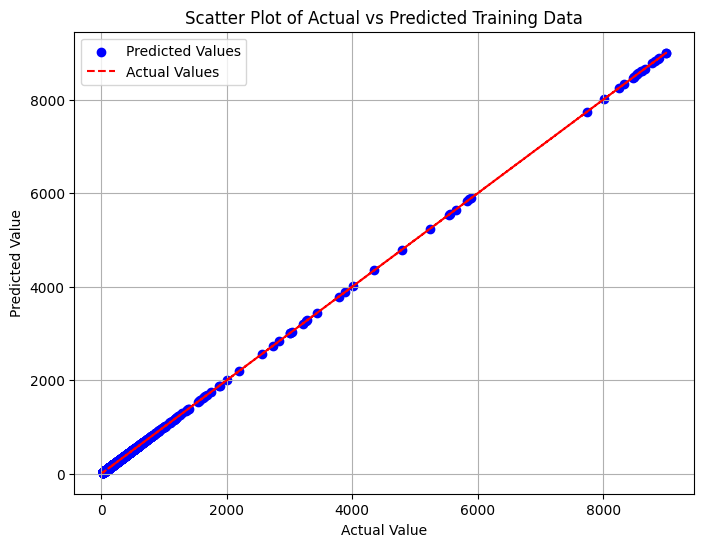

In [162]:
# Visualization of the Actual and Predicted training dataset
train_results1 = pd.DataFrame({
    'Actual': y_train,
    'Predicted': train_preds
})

# Plotting
plt.figure(figsize=(8, 6))

# Plot scatter plot for actual vs predicted values
plt.scatter(train_results1['Actual'], train_results1['Predicted'], color='blue', label = 'Predicted Values')

# Add a diagonal line for comparison
plt.plot(train_results1['Actual'], train_results1['Actual'], color='red', linestyle='--', label = 'Actual Values')

# Add title and labels
plt.title('Scatter Plot of Actual vs Predicted Training Data')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()

plt.grid(True)
plt.show()

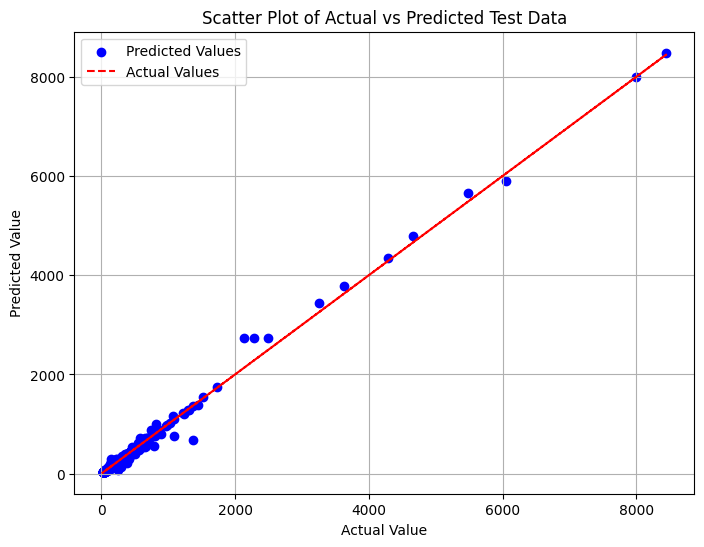

In [163]:
# Visualisation of the actual and predicted testing dataset
test_results1 = pd.DataFrame({
    'Actual': y_test,
    'Predicted': test_preds
})

# Plotting
plt.figure(figsize=(8, 6))

# Plot scatter plot for actual vs predicted values
plt.scatter(test_results1['Actual'], test_results1['Predicted'], color='blue', label = 'Predicted Values')

# Add a diagonal line for comparison
plt.plot(test_results1['Actual'], test_results1['Actual'], color='red', linestyle='--', label = 'Actual Values')

# Add title and labels
plt.title('Scatter Plot of Actual vs Predicted Test Data')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [164]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(y_train, train_preds)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(y_test, test_preds)))
print("RMSE TrainingData = ", str(RMSE_train))
print("RMSE TestData = ", str(RMSE_test))
print('_'*50)
print("RSquared value on train:", DT.score(X_train, y_train))
print("RSquared value on test:", DT.score(X_test, y_test))

RMSE TrainingData =  3.429947916657213e-06
RMSE TestData =  17.809553753933326
__________________________________________________
RSquared value on train: 0.9999999999999999
RSquared value on test: 0.9944188158347714


In [165]:
# RandomForest Regressor
RF = RandomForestRegressor()
RF.fit(X_train, y_train)

RandomForestRegressor()

In [166]:
train_preds1 = RF.predict(X_train)
test_preds1 = RF.predict(X_test)

In [167]:
train_results2 = pd.DataFrame({
    'Actual': y_train,
    'Predicted': train_preds1
})


test_results2 = pd.DataFrame({
    'Actual': y_test,
    'Predicted': test_preds1
})

In [168]:
print("Training Data Predictions:")
print(train_results2)

print("\nTesting Data Predictions:")
print(test_results2)

Training Data Predictions:
            Actual    Predicted
18371   173.087460   173.082023
4055    193.008430   193.011433
6917    156.296406   156.296405
3808     75.042918    75.132841
5749    152.044257   152.043414
...            ...          ...
25916  8250.200000  8315.410000
12056   411.637500   412.703319
21618   237.597598   237.583383
28886   102.826667   102.794867
23886   156.296406   156.296405

[23624 rows x 2 columns]

Testing Data Predictions:
           Actual   Predicted
6500   156.296406  156.296405
29096   70.987124   71.025639
23952  156.296406  156.296405
24426  326.446446  327.295937
21034  208.228228  208.251802
...           ...         ...
27731   44.291667   44.266667
4761   151.880000  151.839200
27778   52.832618   53.234773
19904  158.965517  165.859919
2229   115.502513  115.480151

[5907 rows x 2 columns]


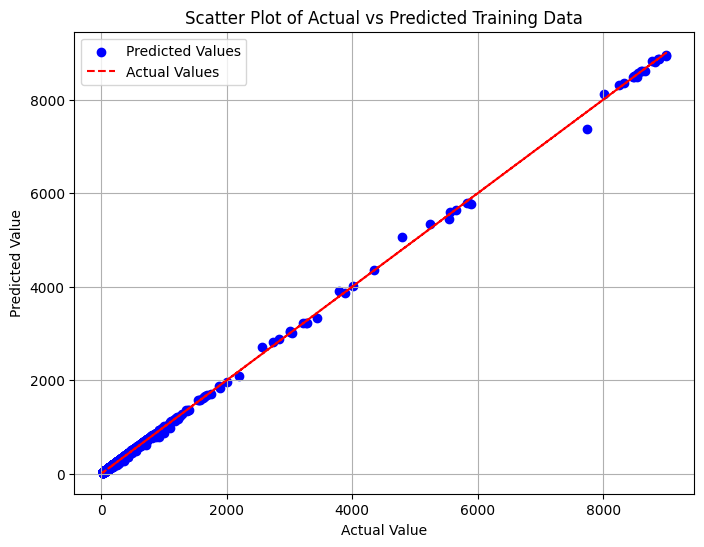

In [169]:
# Visualisation of the actual and predicted training dataset
train_results2 = pd.DataFrame({
    'Actual': y_train,
    'Predicted': train_preds1
})

# Plotting
plt.figure(figsize=(8, 6))

# Plot scatter plot for actual vs predicted values
plt.scatter(train_results2['Actual'], train_results2['Predicted'], color='blue', label = 'Predicted Values')

# Add a diagonal line for comparison
plt.plot(train_results2['Actual'], train_results2['Actual'], color='red', linestyle='--', label = 'Actual Values')

# Add title and labels
plt.title('Scatter Plot of Actual vs Predicted Training Data')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()

plt.grid(True)
plt.show()

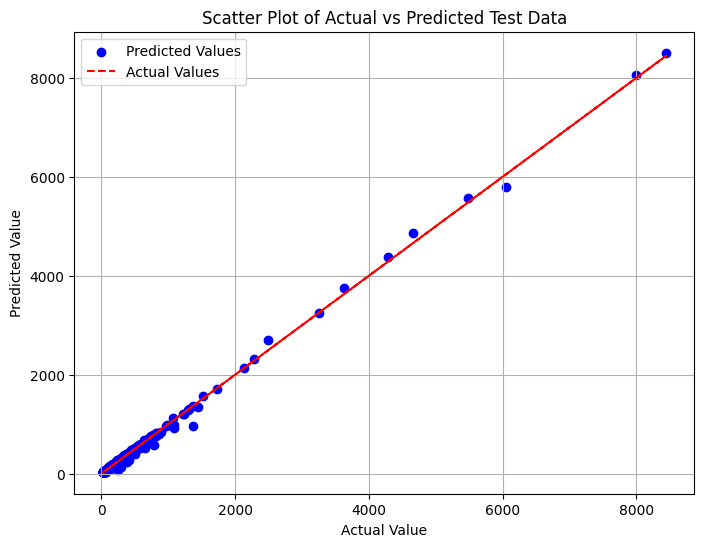

In [170]:
# Visualisation of the actual and predicted testing dataset
test_results2 = pd.DataFrame({
    'Actual': y_test,
    'Predicted': test_preds1
})

# Plotting
plt.figure(figsize=(8, 6))

# Plot scatter plot for actual vs predicted values
plt.scatter(test_results2['Actual'], test_results2['Predicted'], color='blue', label = 'Predicted Values')

# Add a diagonal line for comparison
plt.plot(test_results2['Actual'], test_results2['Actual'], color='red', linestyle='--', label = 'Actual Values')

# Add title and labels
plt.title('Scatter Plot of Actual vs Predicted Test Data')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [171]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(y_train, train_preds1)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(y_test, test_preds1)))
print("RMSE TrainingData = ", str(RMSE_train))
print("RMSE TestData = ", str(RMSE_test))
print('_'*50)
print("RSquared value on train:", RF.score(X_train, y_train))
print("RSquared value on test:", RF.score(X_test, y_test))

RMSE TrainingData =  4.972587339800941
RMSE TestData =  11.049344405402579
__________________________________________________
RSquared value on train: 0.9997033421507634
RSquared value on test: 0.9978517080586843


In [172]:
for i in range(5):
    print(f"test_preds1 {i+1}:")
    print(f"PM2.5: {X_test.iloc[i]['PM25i']}")
    print(f"PM10: {X_test.iloc[i]['PM10i']}")
    print(f"NO: {X_test.iloc[i]['NOi']}")
    print(f"NO2: {X_test.iloc[i]['NO2i']}")
    print(f"NOx: {X_test.iloc[i]['NOxi']}")
    print(f"NH3: {X_test.iloc[i]['NH3i']}")
    print(f"CO: {X_test.iloc[i]['COi']}")
    print(f"SO2: {X_test.iloc[i]['SO2i']}")
    print(f"O3: {X_test.iloc[i]['O3i']}")
    print(f"Benzene: {X_test.iloc[i]['Benzene_i']}")
    print(f"Xylene: {X_test.iloc[i]['xi']}")
    print(f"Toluene: {X_test.iloc[i]['TI']}")
    print(f"Predicted AQI: {test_preds1[i]}\n")

test_preds1 1:
PM2.5: 156.29640566327873
PM10: 112.08473528718757
NO: 21.968412077536705
NO2: 35.700823826408694
NOx: 40.38640416633789
NH3: 5.870869004842993
CO: 25.55225237597289
SO2: 14.53197725590996
O3: 34.49143047551845
Benzene: 32.80840304500585
Xylene: 30.701278234985114
Toluene: 0.0
Predicted AQI: 156.296405411372

test_preds1 2:
PM2.5: 70.98712446351931
PM10: 60.43
NO: 17.075
NO2: 28.424999999999997
NOx: 29.0
NH3: 1.315
CO: 6.8181818181818175
SO2: 2.76
O3: 8.57
Benzene: 18.700000000000003
Xylene: 5.6000000000000005
Toluene: 0.0
Predicted AQI: 71.02563948497856

test_preds1 3:
PM2.5: 156.29640566327873
PM10: 112.08473528718757
NO: 38.987500000000004
NO2: 21.275
NOx: 60.225
NH3: 5.870869004842993
CO: 16.477272727272727
SO2: 6.53
O3: 9.83
Benzene: 3.3000000000000003
Xylene: 9.7
Toluene: 0.0
Predicted AQI: 156.296405411372

test_preds1 4:
PM2.5: 326.44644644644643
PM10: 112.08473528718757
NO: 52.15
NO2: 41.037499999999994
NOx: 93.2
NH3: 5.870869004842993
CO: 27.954545454545453
SO